# Ужасы линейной регрессии

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    HuberRegressor,
    LinearRegression,
    RANSACRegressor,
    TheilSenRegressor,
)
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)

# Разминка
1) Какие признаки может обработать линейная регрессия?
2) Почему нет понятия полиномиальных моделей?
3) Вам дан набор данных из 8 элементов. Вы используете стохастический градиентный спуск с батчем 8. Сколько шагов нужно сделать, чтобы пройти весь набор данных?
4) Вам нужно предсказать, к какой категории относится товар. Всего категорий 100. Как лучше решать такую задачу - через регрессию или классификацию?
5) Вам нужно предсказать, в каком часу была сделана покупка некоторого товара. Вы решили использовать для этого регрессию. Расскажите, как вы будете решать эту задачу. Как вы сформируете таргет? Как будете выдавать предсказания на инференсе?
6) Как выглядит точное решение задачи линейной регрессии (нормальная форма)?

# База
Напомню, что линейная регрессия - это модель следующего вида:
    $$a(x) = \langle w, x \rangle + w_0$$,
    где $w \in \mathbb{R}^d$, $w_0 \in \mathbb{R}$. 
Обучить линейную регрессию - значит найти $w$ и $w_0$., минимизирующие разницу между предсказанными значениями  $y'$ и  $y$.

# Ловушки в данных

Рассмотрим набор данных, состоящий из 2 разных предикторов и четырех таргетов. Этот набор специально создан, чтобы показать важность анализа данных даже в, казалось бы, простой ситуации. Построим 4 разные модели по парам (x123, y1), (x123, y2),(x123, y3), (x4, y4).

In [223]:
data_path = "../data"

In [224]:
quartet_df = pd.read_csv(f"{data_path}/Anscombe_quartet_data.csv")

Для начала рассмотрим значения корреляций между признаками и таргетами

In [225]:
def corrplot(d: pd.DataFrame) -> None:
  corr = d.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  figsize = (min(d.shape[1], 11), min(d.shape[1], 9))
  f, ax = plt.subplots(figsize=figsize)
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

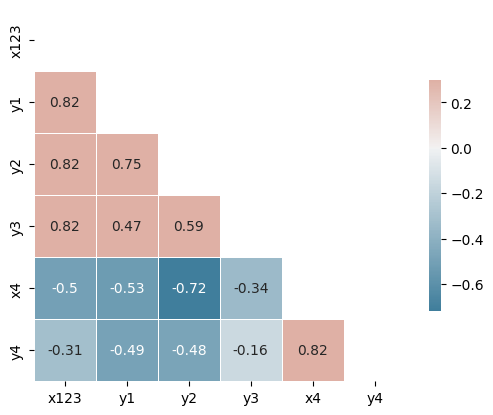

In [226]:
corrplot(quartet_df)

Как видно, корреляции одинаковы. Однако, если построить модели и графики предсказаний, результаты будут знгачительно отличаться.
ЭТакже выведем значения коэффициентов модели.

In [227]:
# Anscombe 1
x = np.array(quartet_df['x123']).reshape((-1, 1))
y = np.array(quartet_df['y1'])
model_1 = LinearRegression().fit(x, y)
y_pred = model_1.predict(x)
r_sq = model_1.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_1.intercept_}")
print(f"slope: {model_1.coef_}")


coefficient of determination: 0.666542459508775
intercept: 3.0000909090909103
slope: [0.50009091]


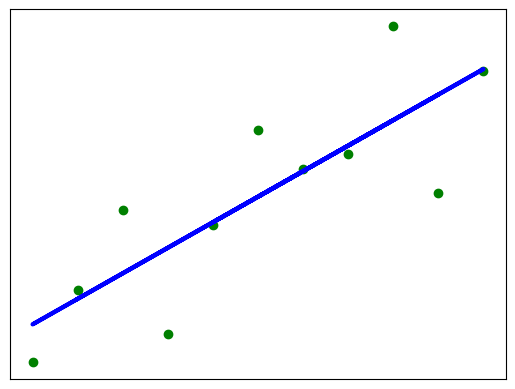

In [228]:
plt.scatter(x, y, color="green")
plt.plot(x, y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [229]:
# Anscombe 2
# your code - do as for ans1
x = np.array(quartet_df['x123']).reshape((-1, 1))
y = np.array(quartet_df['y2'])
model_1 = LinearRegression().fit(x, y)
y_pred = model_1.predict(x)
r_sq = model_1.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_1.intercept_}")
print(f"slope: {model_1.coef_}")


coefficient of determination: 0.6662420337274844
intercept: 3.000909090909089
slope: [0.5]


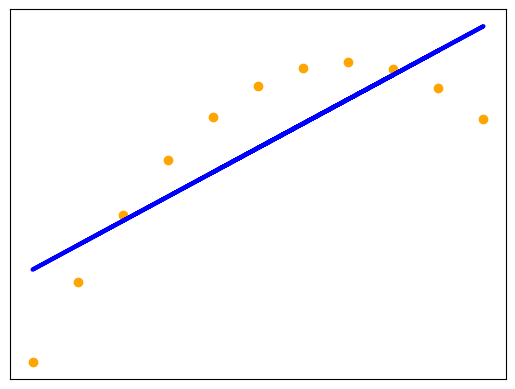

In [230]:
# your code - do as for ans1
plt.scatter(x, y, color="orange")
plt.plot(x, y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [231]:
# Anscombe 3
# your code - do as for ans1
x = np.array(quartet_df['x123']).reshape((-1, 1))
y = np.array(quartet_df['y3'])
model_1 = LinearRegression().fit(x, y)
y_pred = model_1.predict(x)
r_sq = model_1.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_1.intercept_}")
print(f"slope: {model_1.coef_}")

coefficient of determination: 0.6663240410665592
intercept: 3.002454545454545
slope: [0.49972727]


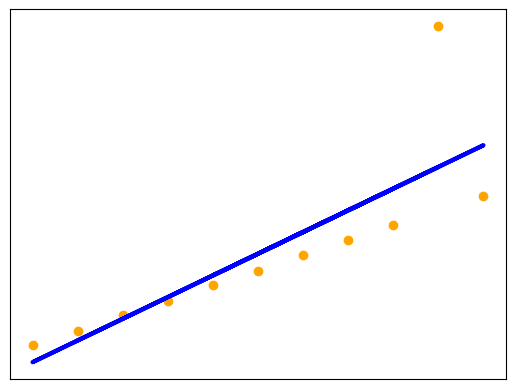

In [232]:
# your code - do as for ans1
plt.scatter(x, y, color="orange")
plt.plot(x, y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [233]:
# Anscombe 4
# your code - do as for ans1
x = np.array(quartet_df['x4']).reshape((-1, 1))
y = np.array(quartet_df['y4'])
model_1 = LinearRegression().fit(x, y)
y_pred = model_1.predict(x)
r_sq = model_1.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_1.intercept_}")
print(f"slope: {model_1.coef_}")

coefficient of determination: 0.6667072568984653
intercept: 3.0017272727272726
slope: [0.49990909]


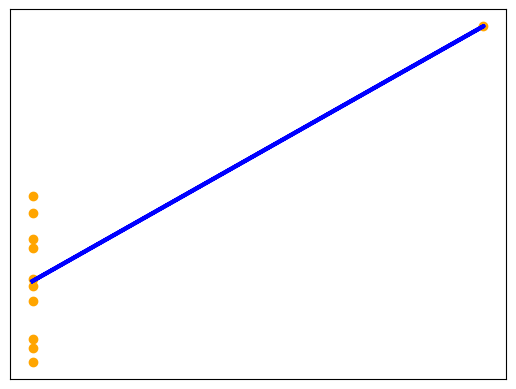

In [234]:
# your code - do as for ans1
plt.scatter(x, y, color="orange")
plt.plot(x, y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Как видно, все эти зависимости имеют разную природу, но при этом порождают модели с практически одинаковыми параметрами. Таким образом, чрезвычайно важно проводить достаточно объемный EDA.
Датасте же - известный набор [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

# Положения линейной регрессии
Далее рассмотрим некоторые положения линейной регрессии, которые задают границы ее применимости (а также что бывает, когда они нарушаются).

**Линейность**: взаимосвязь между зависимыми и независимыми переменными линейна.


**Независимость**: Наблюдения независимы друг от друга.

**Гомоскедастичность**: дисперсия ошибок постоянна на всех уровнях независимых переменных.

**Нормальность**: ошибки подчиняются нормальному распределению.

**Нет мультиколлинеарности**: независимые переменные не сильно коррелируют друг с другом.

**Нет эндогенности**: между ошибками и независимыми переменными нет связи.

## Нелинейность

Рассмотрим набор данных Bluegills.
В 1981 году n = 78 [cинежаберных солнечников](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B5%D0%B6%D0%B0%D0%B1%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D1%81%D0%BE%D0%BB%D0%BD%D0%B5%D1%87%D0%BD%D0%B8%D0%BA) были случайным образом отобраны из озера Мэри в Миннесоте (Кук и Вайсберг, 1999):
* Длина (в мм) рыбы
* Возраст (в годах) рыбы


In [235]:
df = pd.read_csv(f"{data_path}/bluegills.txt", sep="\t")

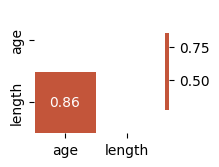

In [236]:
corrplot(df)

Постройте график длины рыбы от возраста 

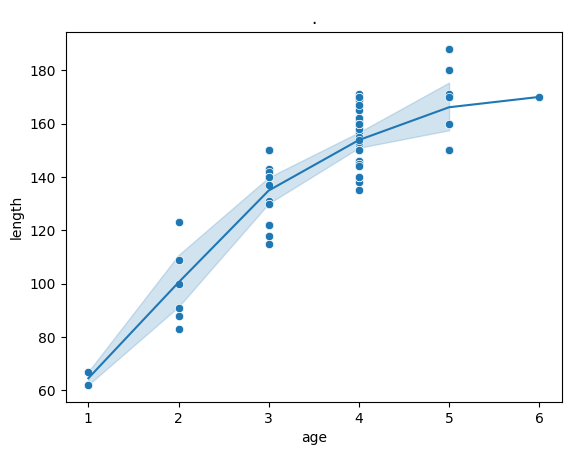

In [237]:
# your code - do as for ans1 - 
df_sorted = df.sort_values('age')
sns.lineplot(data=df_sorted, x='age', y='length')
sns.scatterplot(data=df, x='age', y='length')
plt.xlabel('age')
plt.ylabel('length')
plt.title('.')
plt.show()

График позволяет предположить, что в данных наблюдается положительная динамика. Неудивительно, что с увеличением возраста рыб их длина имеет тенденцию к увеличению. Однако эта тенденция не выглядит вполне линейной. Кажется, что отношения слегка искривлены.

Один из способов моделирования кривизны этих данных — сформулировать «полиномиальную модель второго порядка»:

$ Y=\beta_0+ \sum_i (\alpha_i  X_i^2) + \sum_i (\beta_i  X_i) + \sum_{j \neq i} (\gamma_{ij}  X_i X_j) + \epsilon $

Сделать это просто, введя в данные полиномиальные признаки (PolynomialFeatures) и обучив обычную линейную модель.

**Задание**: Обучите обычную и полиномиальную регрессии на рыбах. Постройте графики предсказаний. 
**Доп.задание**: Определите MSE для двух моделей.

In [238]:
# np.array of age. Ensure that shape is okey
X = np.array(df['age']).reshape((-1, 1))
y = np.array(df['length'])
model_basic =  LinearRegression().fit(X, y)
y_basic = model_basic.predict(X)

In [239]:
degree = 5  # Set the polynomial degree
poly_features = PolynomialFeatures(degree=degree) # Instantiate polynomial features 
X_poly = poly_features.fit_transform(X) # call fit_transfrom of poly_features on age

model_poly = LinearRegression().fit(X_poly, y) # create linear regression object
# fit model on processed data

y_poly = model_poly.predict(X_poly)

In [240]:
print(f"coefficient of determination of linear model: {model_basic.score(X, y)}")
print(f"coefficient of determination of polynomial model: {model_poly.score(X_poly, y)}")

coefficient of determination of linear model: 0.7348821471782518
coefficient of determination of polynomial model: 0.8035456295594721


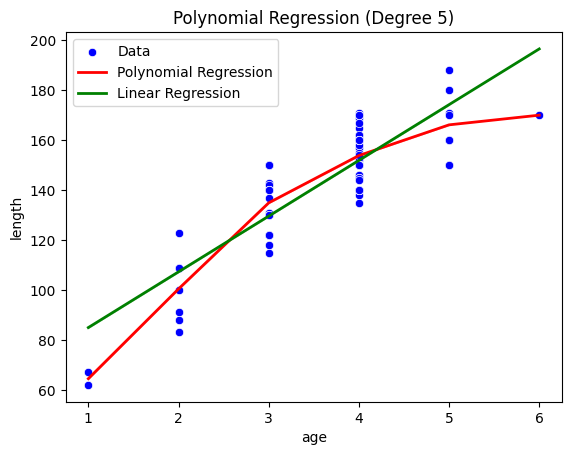

In [241]:
sns.scatterplot(df,x="age", y="length", label='Data', color='blue')
sns.lineplot(x=df["age"], y=y_poly, label='Polynomial Regression', color='red', linewidth=2)
sns.lineplot(x=df["age"], y=y_basic, label='Linear Regression', color='green', linewidth=2)
plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.title(f'Polynomial Regression (Degree {degree})')
plt.show()

In [242]:
# MSE of linear model and poly
print('MSE:', mean_squared_error(y, y_basic))
print('MSE:', mean_squared_error(y, y_poly))

MSE: 152.47226648794907
MSE: 112.98312355701634


**Задание**: Постройте модель с фичами высокой степени.

Score: 0.803545629559472
MSE: 112.98312355701637


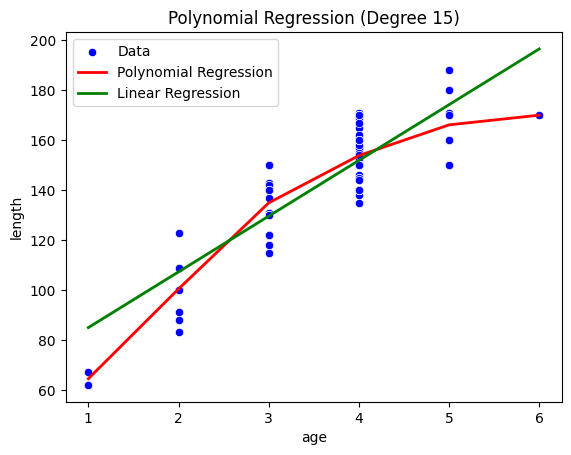

In [243]:
degree =  15  # Set the polynomial degree
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model_poly = LinearRegression().fit(X_poly, y)
y_poly = model_poly.predict(X_poly)

print('Score:', model_poly.score(X_poly, y))
print('MSE:', mean_squared_error(y, y_poly))

sns.scatterplot(df,x="age", y="length", label='Data', color='blue')
sns.lineplot(x=df["age"], y=y_poly, label='Polynomial Regression', color='red', linewidth=2)
sns.lineplot(x=df["age"], y=y_basic, label='Linear Regression', color='green', linewidth=2)
plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.title(f'Polynomial Regression (Degree {degree})')
plt.show()

**Задание**: Постройте модель для наборов Anscombe 1 и Anscombe 2. Напишите, какие степени полинома подойдут лучше всего.

**Задание со звездочкой**: Постройте модель с использованием другого базиса, не полиномиального. Проиллюстрируйте ее применение на примерах из практики.

In [244]:

def linear_and_poly_model(degree: int, X: np.ndarray, y: np.ndarray) -> tuple:
    '''Fit linear and polynomial models and return them'''
    X = X.reshape((-1, 1))
    
    # linear model
    model_basic = LinearRegression().fit(X, y)
    
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model_poly = LinearRegression().fit(X_poly, y)
    
    return model_basic, [model_poly, X_poly]
    

Score: 0.9725378481970203
MSE: 0.10303971846026522


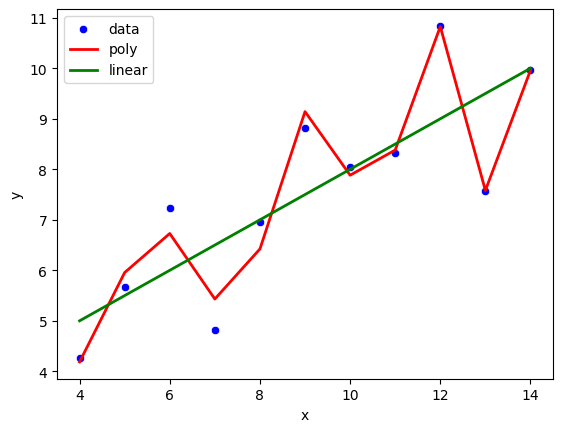

In [245]:
X = np.array(quartet_df['x123'])
y = np.array(quartet_df['y1'])

degree = 15
model_basic, poly= linear_and_poly_model(degree, X, y)
model_poly, X_poly = poly
y_basic = model_basic.predict(X.reshape((-1,1)))
y_poly = model_poly.predict(X_poly)

print('Score:', model_poly.score(X_poly, y))
print('MSE:', mean_squared_error(y, y_poly))
sns.scatterplot(x=X, y=y, label='data', color='blue')
sns.lineplot(x=X, y=y_poly, label='poly', color='red', linewidth=2)
sns.lineplot(x=X, y=y_basic, label='linear', color='green', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Search good degrees

In [246]:
def calc_best_degree(X: np.ndarray, y: np.ndarray, **kwargs) -> tuple:
    '''Calculate best degree of poly model, returns 
        (history_mse, history_score), (best_mse, best_score),
        best_degree, fitted model, X_poly
    *args: min_degree, max_degree, step, polyfeatures
    '''
    min_degree, max_degree, step = kwargs.get('min_degree', 1), kwargs.get('max_degree', 15), kwargs.get('step', 1)
    degrees = np.arange(min_degree, max_degree+1, step)
    
    history_score = []
    history_mse = []
    
    X = X.reshape((-1, 1))
    
    best_degree = degrees[0]
    best_model = None
    best_X_poly = None
    best_mse = np.inf
    best_score = 0
    
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)
        model_poly = LinearRegression().fit(X_poly, y)
        y_poly = model_poly.predict(X_poly)
        
        mse = mean_squared_error(y, y_poly)
        score = model_poly.score(X_poly, y)
        
        history_mse.append(mse)
        history_score.append(score)
        
        if score > best_score:
            best_mse = mse
            best_degree = degree
            best_model = model_poly
            best_X_poly = X_poly
            best_score = score
    
    return (history_mse, history_score), (best_mse, best_score), best_degree, best_model, best_X_poly
    

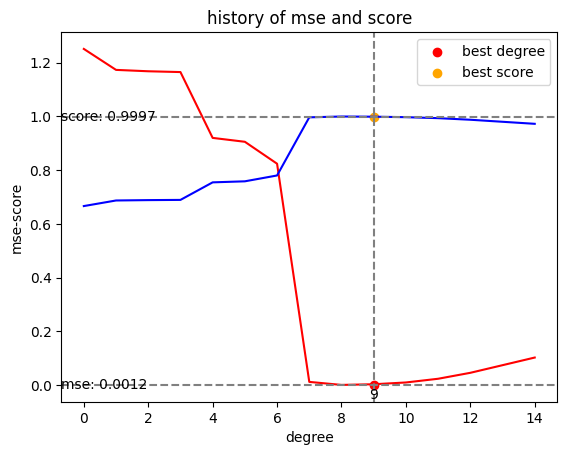

In [247]:
X = np.array(quartet_df['x123'])
y = np.array(quartet_df['y1'])

history, best, best_degree, model_poly, X_poly = \
    calc_best_degree(X, y, min_degree=1, max_degree=15, step=1)
history_mse, history_score = history
best_mse, best_score = best
    
plt.plot(history_mse, color='red')
plt.plot(history_score, color='blue')
plt.scatter(best_degree, best_mse, color='red', label='best degree')
plt.scatter(best_degree, best_score, color='orange', label='best score')
plt.axvline(x=best_degree, color='gray', linestyle='--')
plt.axhline(y=best_mse, color='gray', linestyle='--')
plt.axhline(y=best_score, color='gray', linestyle='--')
plt.text(best_degree, plt.ylim()[0], f'{best_degree}', ha='center', va='bottom', color='black')
plt.text(plt.xlim()[0], best_mse, f'mse: {best_mse:.4f}', ha='left', va='center', color='black')
plt.text(plt.xlim()[0], best_score, f'score: {best_score:.4f}', ha='left', va='center', color='black')
plt.xlabel('degree')
plt.ylabel('mse-score')
plt.title('history of mse and score')
plt.legend()
plt.show()

Score: 0.9996851678557589
MSE: 0.0011812699797736483


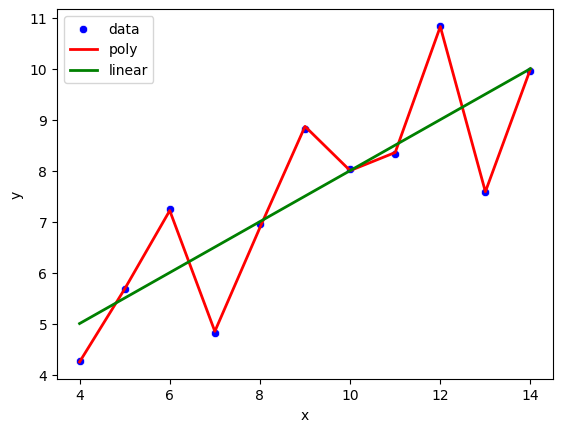

In [248]:
# check best model

model_basic = LinearRegression().fit(X.reshape((-1, 1)), y)

y_poly = model_poly.predict(X_poly)
y_basic = model_basic.predict(X.reshape((-1, 1)))

print('Score:', model_poly.score(X_poly, y))
print('MSE:', mean_squared_error(y, y_poly))
sns.scatterplot(x=X, y=y, label='data', color='blue')
sns.lineplot(x=X, y=y_poly, label='poly', color='red', linewidth=2)
sns.lineplot(x=X, y=y_basic, label='linear', color='green', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

build poly model with another basis



In [249]:
from scipy.interpolate import BSpline
from sklearn.base import BaseEstimator, TransformerMixin

# spline basis for poly features
class SplinePolyFeatures(TransformerMixin, BaseEstimator):
    def __init__(self, degree=3, n_knots=10):
        self.degree = degree
        self.n_knots = n_knots

    def fit(self, X, y=None):
        X = np.array(X).ravel()
        self.x_min_ = X.min()
        self.x_max_ = X.max()
        
        internal_knots = np.linspace(self.x_min_, self.x_max_, self.n_knots)
        
        self.knots_ = np.concatenate((
            np.full(self.degree + 1, self.x_min_),
            internal_knots,
            np.full(self.degree + 1, self.x_max_)
        ))
        return self

    def transform(self, X):
        X = np.array(X).ravel()
        n_bases = len(self.knots_) - self.degree - 1
        coeffs = np.eye(n_bases)
        
        spline_features = [BSpline(self.knots_, coeffs[j], self.degree, extrapolate=False)(X) for j in range(n_bases)]
        return np.vstack(spline_features).T

Example using spline basis and compare with basic polynomial model.
Here i set degree = 2 to illustrate the difference

[Poly]Score: 0.6873274348982259
[Poly]MSE: 1.17316710319983
[Spline]Score: 1.0
[Spline]MSE: 1.0183477140125788e-29


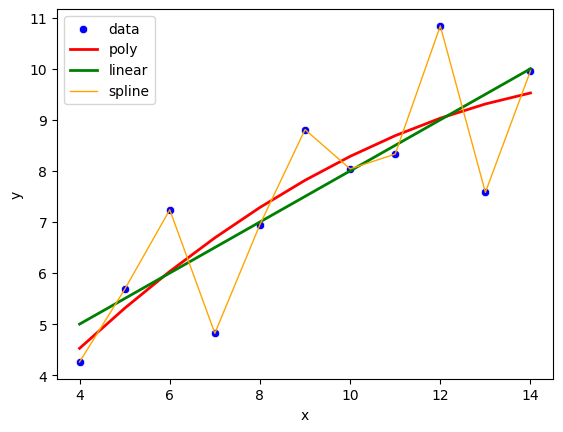

In [250]:
X = np.array(quartet_df['x123'])
y = np.array(quartet_df['y1'])

degree = 2
model_basic, poly= linear_and_poly_model(degree, X, y)
model_poly, X_poly = poly
y_basic = model_basic.predict(X.reshape((-1,1)))
y_poly = model_poly.predict(X_poly)

print('[Poly]Score:', model_poly.score(X_poly, y))
print('[Poly]MSE:', mean_squared_error(y, y_poly))

spline_features = SplinePolyFeatures(degree=degree, n_knots=10)
X_spline = spline_features.fit_transform(X.reshape((-1, 1)))
model_spline = LinearRegression().fit(X_spline, y)
y_spline = model_spline.predict(X_spline)
print('[Spline]Score:', model_spline.score(X_spline, y))
print('[Spline]MSE:', mean_squared_error(y, y_spline))


sns.scatterplot(x=X, y=y, label='data', color='blue')
sns.lineplot(x=X, y=y_poly, label='poly', color='red', linewidth=2)
sns.lineplot(x=X, y=y_basic, label='linear', color='green', linewidth=2)
sns.lineplot(x=X, y=y_spline, label='spline', color='orange', linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Выбросы
Как мы уже видели, выбросы могут сильно влиять на предсказания линейной модели. Даже один выброс может нарушить одно из условий линейной регрессии. К счастью, существует много способов с ними бороться.
Простейший вариант - использовать не MSE, а MAE. Почему?
Однако есть и более сложные варианты. Например, комбинация MSE и MAE дает **HuberLoss**.

Другой робастный вариант - **Theil-Sen regression**. Этот метод строит медиану наклона модели между всеми парами наблюдений. Проблема этого метода в том, что для больших наборов данных вычислительная сложность метода становится слишком большой.

Третий метод: **RANSAC**. В этом методе итеративно берутся подвыборки заданного размера, строятся модели и считаются расстояния от предсказания до реальной точки. Далее точки, для которых расстояние меньше некоторой границы, считаются доверенными. На этих данных обучается новая модель-кандидат. В качестве финальной используется лучший кандидат. Однако данный метод подходит только для моделей, которые не требуют очень большого количества данных.

Рассмотрим синтетические данные. Пусть это будут синусоидальные данные, но некоторые наблюдения будут "испорчены"

In [251]:
X = np.random.uniform(0, 1.5, size=300)
y = np.sin(1.5 * np.pi * X) + np.random.normal(scale=0.1, size=X.shape)
X = X.reshape(-1,1)

X_test = np.random.uniform(0, 1.5, size=300) 
y_test = np.sin(1.5 * np.pi * X_test) + np.random.normal(scale=0.1, size=X_test.shape)
X_test = X_test.reshape(-1,1)

y_errors = y.copy()
y_errors[::5] = 3

X_errors = X.copy()
X_errors[::5] = 3

y_errors_large = y.copy()
y_errors_large[::5] = 10

X_errors_large = X.copy()
X_errors_large[::5] = 10

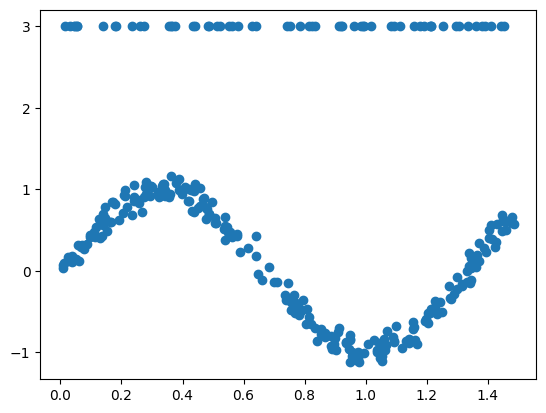

In [252]:
plt.scatter(X, y_errors)

**Задание**: Последовательно постройте различные модели для разных видов испорченности данных.

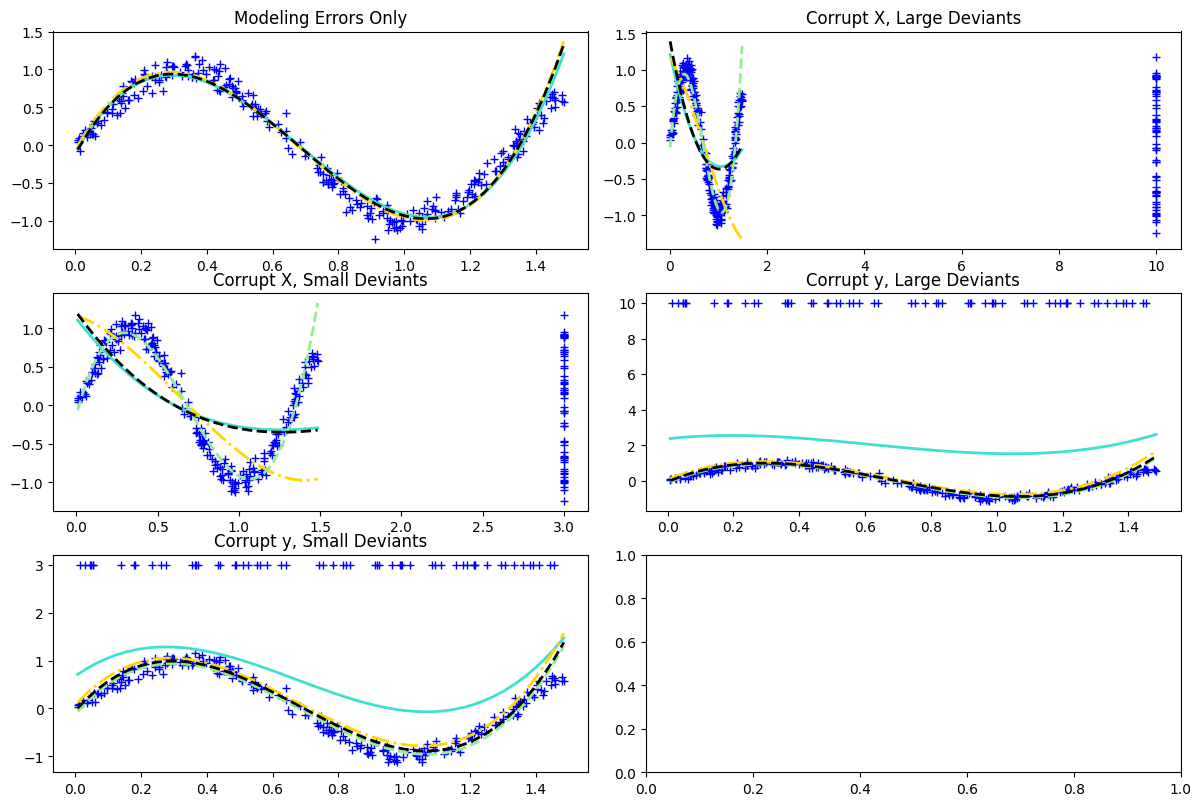

In [253]:
estimators = {
    "OLS": LinearRegression(),
    "Theil-Sen": TheilSenRegressor(random_state=42),
    "RANSAC": RANSACRegressor(random_state=42),
    "Huber": HuberRegressor(),
}

colors = {
    "OLS": "turquoise",
    "Theil-Sen": "gold",
    "RANSAC": "lightgreen",
    "Huber": "black",
}
linestyle = {"OLS": "-", "Theil-Sen": "-.", "RANSAC": "--", "Huber": "--"}
lw = 2
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (12,8))
fig.tight_layout()
x_plot = np.linspace(X.min(), X.max())
time_dict = {name: 0. for name in estimators.keys()}
errors_df = pd.DataFrame(columns = list(estimators.keys()))
time_dict["Problem"] = "Sum time"
for i, (title, this_X, this_y) in enumerate([
    ("Modeling Errors Only", X, y),
    ("Corrupt X, Small Deviants", X_errors, y),
    ("Corrupt y, Small Deviants", X, y_errors),
    ("Corrupt X, Large Deviants", X_errors_large, y),
    ("Corrupt y, Large Deviants", X, y_errors_large),
]):
    ax[i % 3, i // 3].plot(this_X[:, 0], this_y, "b+")
    errors_dict = {"Problem": title}
    for name, estimator in estimators.items():
        # Сделайте комбинацию полиномиальной регрессии и текущей модели. Используйте make_pipeline
        model = make_pipeline(PolynomialFeatures(degree=3), estimator)
        t0 = time.time()
        model.fit(this_X, this_y)
        time_dict[name] += time.time() - t0
        mse = mean_squared_error(this_y, model.predict(this_X))
        errors_dict[name] = [mse]
        y_plot = model.predict(x_plot[:, np.newaxis])
        ax[i % 3, i // 3].plot(
            x_plot,
            y_plot,
            color=colors[name],
            linestyle=linestyle[name],
            linewidth=lw,
            label="%s: error = %.3f" % (name, mse),
        )
    errors_df = pd.concat([errors_df,pd.DataFrame.from_dict(data=errors_dict)])
    ax[i % 3, i // 3].title.set_text(title)
errors_df = pd.concat([errors_df, pd.DataFrame(time_dict, index=[0])]) 
plt.show()

In [254]:
colors = {
    "OLS": "turquoise",
    "Theil-Sen": "gold",
    "RANSAC": "lightgreen",
    "Huber": "black",
}

In [255]:
errors_df

,OLS,Theil-Sen,RANSAC,Huber,Problem
0,0.025906,0.028332,2.686590e-02,0.026981,Modeling Errors Only
0,0.335633,23.865023,1.810438e+03,0.336670,"Corrupt X, Small Deviants"
0,1.518852,1.746348,1.911027e+00,1.838582,"Corrupt y, Small Deviants"
0,0.322710,65413.988635,8.986909e+06,0.325747,"Corrupt X, Large Deviants"
0,16.022225,19.408312,2.011123e+01,19.861143,"Corrupt y, Large Deviants"
0,0.002815,0.703521,2.021837e-02,0.018178,Sum time


**Задание**: Поиграйте с этими датасетами и параметрами моделей. 
Ответьте на вопросы:
- При каких размерах датасетов лучше использовать каждый из алгоритмов
- При каких процентах выбросов и их значениях лучше использовать каждый из алгоритмов
- Влияет ли то, как распределены выбросы, на выбор метода
- Влияет ли отношение шума к сигналу на выбор алгоритма
- Какие алгоритмы более чувствительны к параметрам, какие менее
Для ответов покажите таблицы и/или графики

In [ ]:
def _generate_data_with_outliers(n_samples=100, **kwargs) -> tuple:
    '''
    parameters:
    n_samples: int, number of samples
    outliers: float, percentage of outliers (0-1); for example 0.1 means 10% outliers from data size
    outliers_distribution: str, distribution of outliers,
    outliers_error: scale of outliers error, default 3
    outliers_error_large: scale of outliers error, default 10
    '''
    
    outliers, outliers_distribution, outliers_error, outliers_error_large = \
        kwargs.get('outliers', 0.1), kwargs.get('outliers_distribution', 'normal'), \
        kwargs.get('outliers_error', 3), kwargs.get('outliers_error_large', 10)
    
    
    X = np.random.uniform(0, 1.5, size=n_samples)
    y = np.sin(1.5 * np.pi * X) + np.random.normal(scale=0.1, size=X.shape)
    X = X.reshape((-1,1))
    X_test = np.random.uniform(0, 1.5, size=n_samples)
    y_test = np.sin(1.5 * np.pi * X_test) + np.random.normal(scale=0.1, size=X_test.shape)
    X_test = X_test.reshape((-1,1))
    
    y_errors = y.copy()
    X_errors = X.copy()
    X_errors_large = X.copy()
    y_errors_large = y.copy()
    

    assert outliers_distribution in ['normal', 'uniform', 'exp'], "Invalid distribution"
    
    if outliers <= 0 or outliers >= 1:
        return (X, y, X_test, y_test), (X_errors, y_errors), (X_errors_large, y_errors_large)
    
    outliers = int(n_samples * outliers)
    outliers_idx = np.random.choice(n_samples, outliers, replace=False)
    
    if outliers_distribution == 'uniform':
        if outliers_error != 0:
            y_errors[outliers_idx] += np.random.uniform(-outliers_error, outliers_error, size=outliers)
            X_errors[outliers_idx] += np.random.uniform(-outliers_error, outliers_error, size=outliers).reshape((-1,1))
        if outliers_error_large != 0:
            y_errors_large[outliers_idx] += np.random.uniform(-outliers_error_large, outliers_error_large, size=outliers)
            X_errors_large[outliers_idx] += np.random.uniform(-outliers_error_large, outliers_error_large, size=outliers).reshape((-1,1))
            
    elif outliers_distribution == 'normal':
        if outliers_error != 0:
            y_errors[outliers_idx] += np.random.normal(scale=outliers_error, size=outliers)
            X_errors[outliers_idx] += np.random.normal(scale=outliers_error, size=outliers).reshape((-1,1))
        if outliers_error_large != 0:
            y_errors_large[outliers_idx] += np.random.normal(scale=outliers_error_large, size=outliers)
            X_errors_large[outliers_idx] += np.random.normal(scale=outliers_error_large, size=outliers).reshape((-1,1))
    elif outliers_distribution == 'exp':
        if outliers_error != 0:
            y_errors[outliers_idx] += np.random.exponential(scale=outliers_error, size=outliers)
            X_errors[outliers_idx] += np.random.exponential(scale=outliers_error, size=outliers).reshape((-1,1))
        if outliers_error_large != 0:
            y_errors_large[outliers_idx] += np.random.exponential(scale=outliers_error_large, size=outliers)
            X_errors_large[outliers_idx] += np.random.exponential(scale=outliers_error_large, size=outliers).reshape((-1,1))
            
            
        
    
    return (X, y, X_test, y_test), (X_errors, y_errors), (X_errors_large, y_errors_large)

In [257]:
def _compare_models(data, data_errors, data_errors_large):
    '''
    returns [approach: [model:(mse, time, score)]]
    '''
    X, y, X_test, y_test = data
    X_errors, y_errors = data_errors
    X_errors_large, y_errors_large = data_errors_large 
    
    
    
    estimators = {
        "OLS": LinearRegression(),
        "Theil-Sen": TheilSenRegressor(random_state=42),
        "RANSAC": RANSACRegressor(random_state=42),
        "Huber": HuberRegressor(),
    }

    colors = {
        "OLS": "turquoise",
        "Theil-Sen": "gold",
        "RANSAC": "lightgreen",
        "Huber": "black",
    }
    linestyle = {"OLS": "-", "Theil-Sen": "-.", "RANSAC": "--", "Huber": "--"}

    compare = dict()
    
    for i, (title, this_X, this_y) in enumerate([
        ("Modeling Errors Only", X, y),
        ("Corrupt X, Small Deviants", X_errors, y),
        ("Corrupt y, Small Deviants", X, y_errors),
        ("Corrupt X, Large Deviants", X_errors_large, y),
        ("Corrupt y, Large Deviants", X, y_errors_large),
    ]):
        compare[title] = dict()
        
        for name, estimator in estimators.items():
            model = make_pipeline(PolynomialFeatures(degree=3), estimator)
            t0 = time.time()
            model.fit(this_X, this_y)
            time_s = time.time() - t0
            mse = mean_squared_error(this_y, model.predict(this_X))
            score = model.score(X, this_y)
            compare[title][name] = (mse, time_s, score)
            
    return compare
            
        

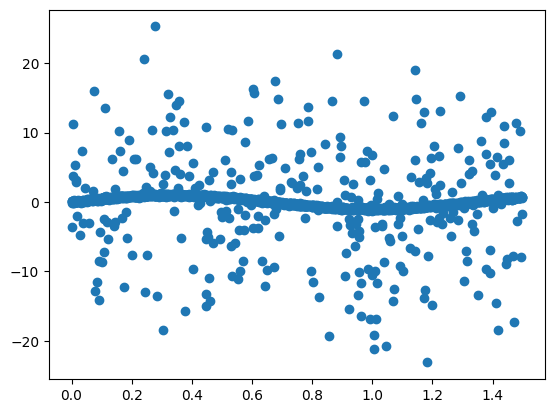

In [258]:
data, data_errors, data_errors_large = \
    _generate_data_with_outliers(n_samples=2077, outliers=0.15, outliers_distribution='normal', outliers_error=0, outliers_error_large=8)
X, y, X_test, y_test = data
X_errors, y_errors = data_errors
X_errors_large, y_errors_large = data_errors_large

plt.scatter(X, y_errors_large)
plt.show()

best model by sizes

In [259]:
sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2077]

best_models = [None]*len(sizes)
best_mse = [None]*len(sizes)
best_score = [0]*len(sizes)

for i, size in enumerate(sizes):
    data, data_errors, data_errors_large = \
        _generate_data_with_outliers(n_samples=size, outliers=0.1, outliers_distribution='normal', outliers_error=3, outliers_error_large=10)
    
    compare = _compare_models(data, data_errors, data_errors_large)
    # print(compare)
    models = compare['Modeling Errors Only']
    for name, (mse, time_s, score) in models.items():
        print(f'size: {size}, model: {name}, mse: {mse:.4f}, time: {time_s:.4f}, score: {score:.4f}')
        if score > best_score[i]:
            best_mse[i] = mse
            best_score[i] = score
            best_models[i] = name
            
            
for i, size in enumerate(sizes):
    print(f'size: {size}, best model: {best_models[i]}, mse: {best_mse[i]:.4f}, score: {best_score[i]:.4f}')    

size: 100, model: OLS, mse: 0.0306, time: 0.0009, score: 0.9377
size: 100, model: Theil-Sen, mse: 0.0351, time: 0.1174, score: 0.9286
size: 100, model: RANSAC, mse: 0.0306, time: 0.0016, score: 0.9377
size: 100, model: Huber, mse: 0.0311, time: 0.0026, score: 0.9366
size: 200, model: OLS, mse: 0.0315, time: 0.0004, score: 0.9302
size: 200, model: Theil-Sen, mse: 0.0376, time: 0.1200, score: 0.9167
size: 200, model: RANSAC, mse: 0.0318, time: 0.0019, score: 0.9296
size: 200, model: Huber, mse: 0.0344, time: 0.0022, score: 0.9237
size: 300, model: OLS, mse: 0.0285, time: 0.0004, score: 0.9410
size: 300, model: Theil-Sen, mse: 0.0315, time: 0.1260, score: 0.9346
size: 300, model: RANSAC, mse: 0.0341, time: 0.0018, score: 0.9292
size: 300, model: Huber, mse: 0.0301, time: 0.0024, score: 0.9376
size: 400, model: OLS, mse: 0.0288, time: 0.0005, score: 0.9400
size: 400, model: Theil-Sen, mse: 0.0352, time: 0.1407, score: 0.9267
size: 400, model: RANSAC, mse: 0.0288, time: 0.0011, score: 0.940

cам по себе ols и huber, ransac лучше работает на любых датасетах. (ransac, huber буквально вплотную подходят к ols, иногда даже score равны)

теперь рассмотрим то же самое, но с выбросами

In [260]:
sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2077]

best_models = [dict()]*len(sizes)
best_mse = [dict()]*len(sizes)
best_score = [dict()]*len(sizes)

for i, size in enumerate(sizes):
    data, data_errors, data_errors_large = \
        _generate_data_with_outliers(n_samples=size, outliers=0.1, outliers_distribution='uniform', outliers_error=3, outliers_error_large=10)
    
    compare = _compare_models(data, data_errors, data_errors_large)
    
    for title, models in compare.items():
        if title == 'Modeling Errors Only':
            continue
        
        for name, (mse, time_s, score) in models.items():
            if best_score[i].get(title) is None or score > best_score[i].get(title):
                best_mse[i][title] = mse
                best_score[i][title] = score
                best_models[i][title] = name
            
for i, size in enumerate(sizes):
    print(f'size: {size},\n best models: {best_models[i]}') 

size: 100,
 best models: {'Corrupt X, Small Deviants': 'RANSAC', 'Corrupt y, Small Deviants': 'OLS', 'Corrupt X, Large Deviants': 'RANSAC', 'Corrupt y, Large Deviants': 'OLS'}
size: 200,
 best models: {'Corrupt X, Small Deviants': 'RANSAC', 'Corrupt y, Small Deviants': 'OLS', 'Corrupt X, Large Deviants': 'RANSAC', 'Corrupt y, Large Deviants': 'OLS'}
size: 300,
 best models: {'Corrupt X, Small Deviants': 'RANSAC', 'Corrupt y, Small Deviants': 'OLS', 'Corrupt X, Large Deviants': 'RANSAC', 'Corrupt y, Large Deviants': 'OLS'}
size: 400,
 best models: {'Corrupt X, Small Deviants': 'RANSAC', 'Corrupt y, Small Deviants': 'OLS', 'Corrupt X, Large Deviants': 'RANSAC', 'Corrupt y, Large Deviants': 'OLS'}
size: 500,
 best models: {'Corrupt X, Small Deviants': 'RANSAC', 'Corrupt y, Small Deviants': 'OLS', 'Corrupt X, Large Deviants': 'RANSAC', 'Corrupt y, Large Deviants': 'OLS'}
size: 600,
 best models: {'Corrupt X, Small Deviants': 'RANSAC', 'Corrupt y, Small Deviants': 'OLS', 'Corrupt X, Large D

{'Corrupt X, Small Deviants': {'OLS': [0.3037732342833796, 0.29816961240490053, 0.3967801012823149, 0.3751447580646773, 0.34881833906619475, 0.3461969387258119, 0.38760337591912447, 0.406193360437926, 0.38555991277927343, 0.39538816803048393, 0.38741929754839, 0.37958648116193805], 'Theil-Sen': [541.9773193012317, 388.6058268231411, 535.6959252185188, 629.8409366971647, 158.8747769626435, 338.8479266026754, 267.0278463849116, 439.0318752737884, 247.6923178244838, 410.2696616922955, 416.61909078885566, 444.1592503068719], 'RANSAC': [1030.929377028419, 885.3774999540914, 981.7215320291704, 1221.3655250136972, 426.21885594212796, 1119.3747880411688, 671.7611624543498, 947.7648366607673, 431.92263982931814, 1059.084256108876, 871.9193777539906, 750.9429817230878], 'Huber': [0.3179118869934302, 0.3017812989616333, 0.4045833490545859, 0.3801778527592237, 0.3574890938423139, 0.3509123098711339, 0.3931348574095691, 0.41124433989947806, 0.4061347682882633, 0.39893899592809945, 0.393775661173144

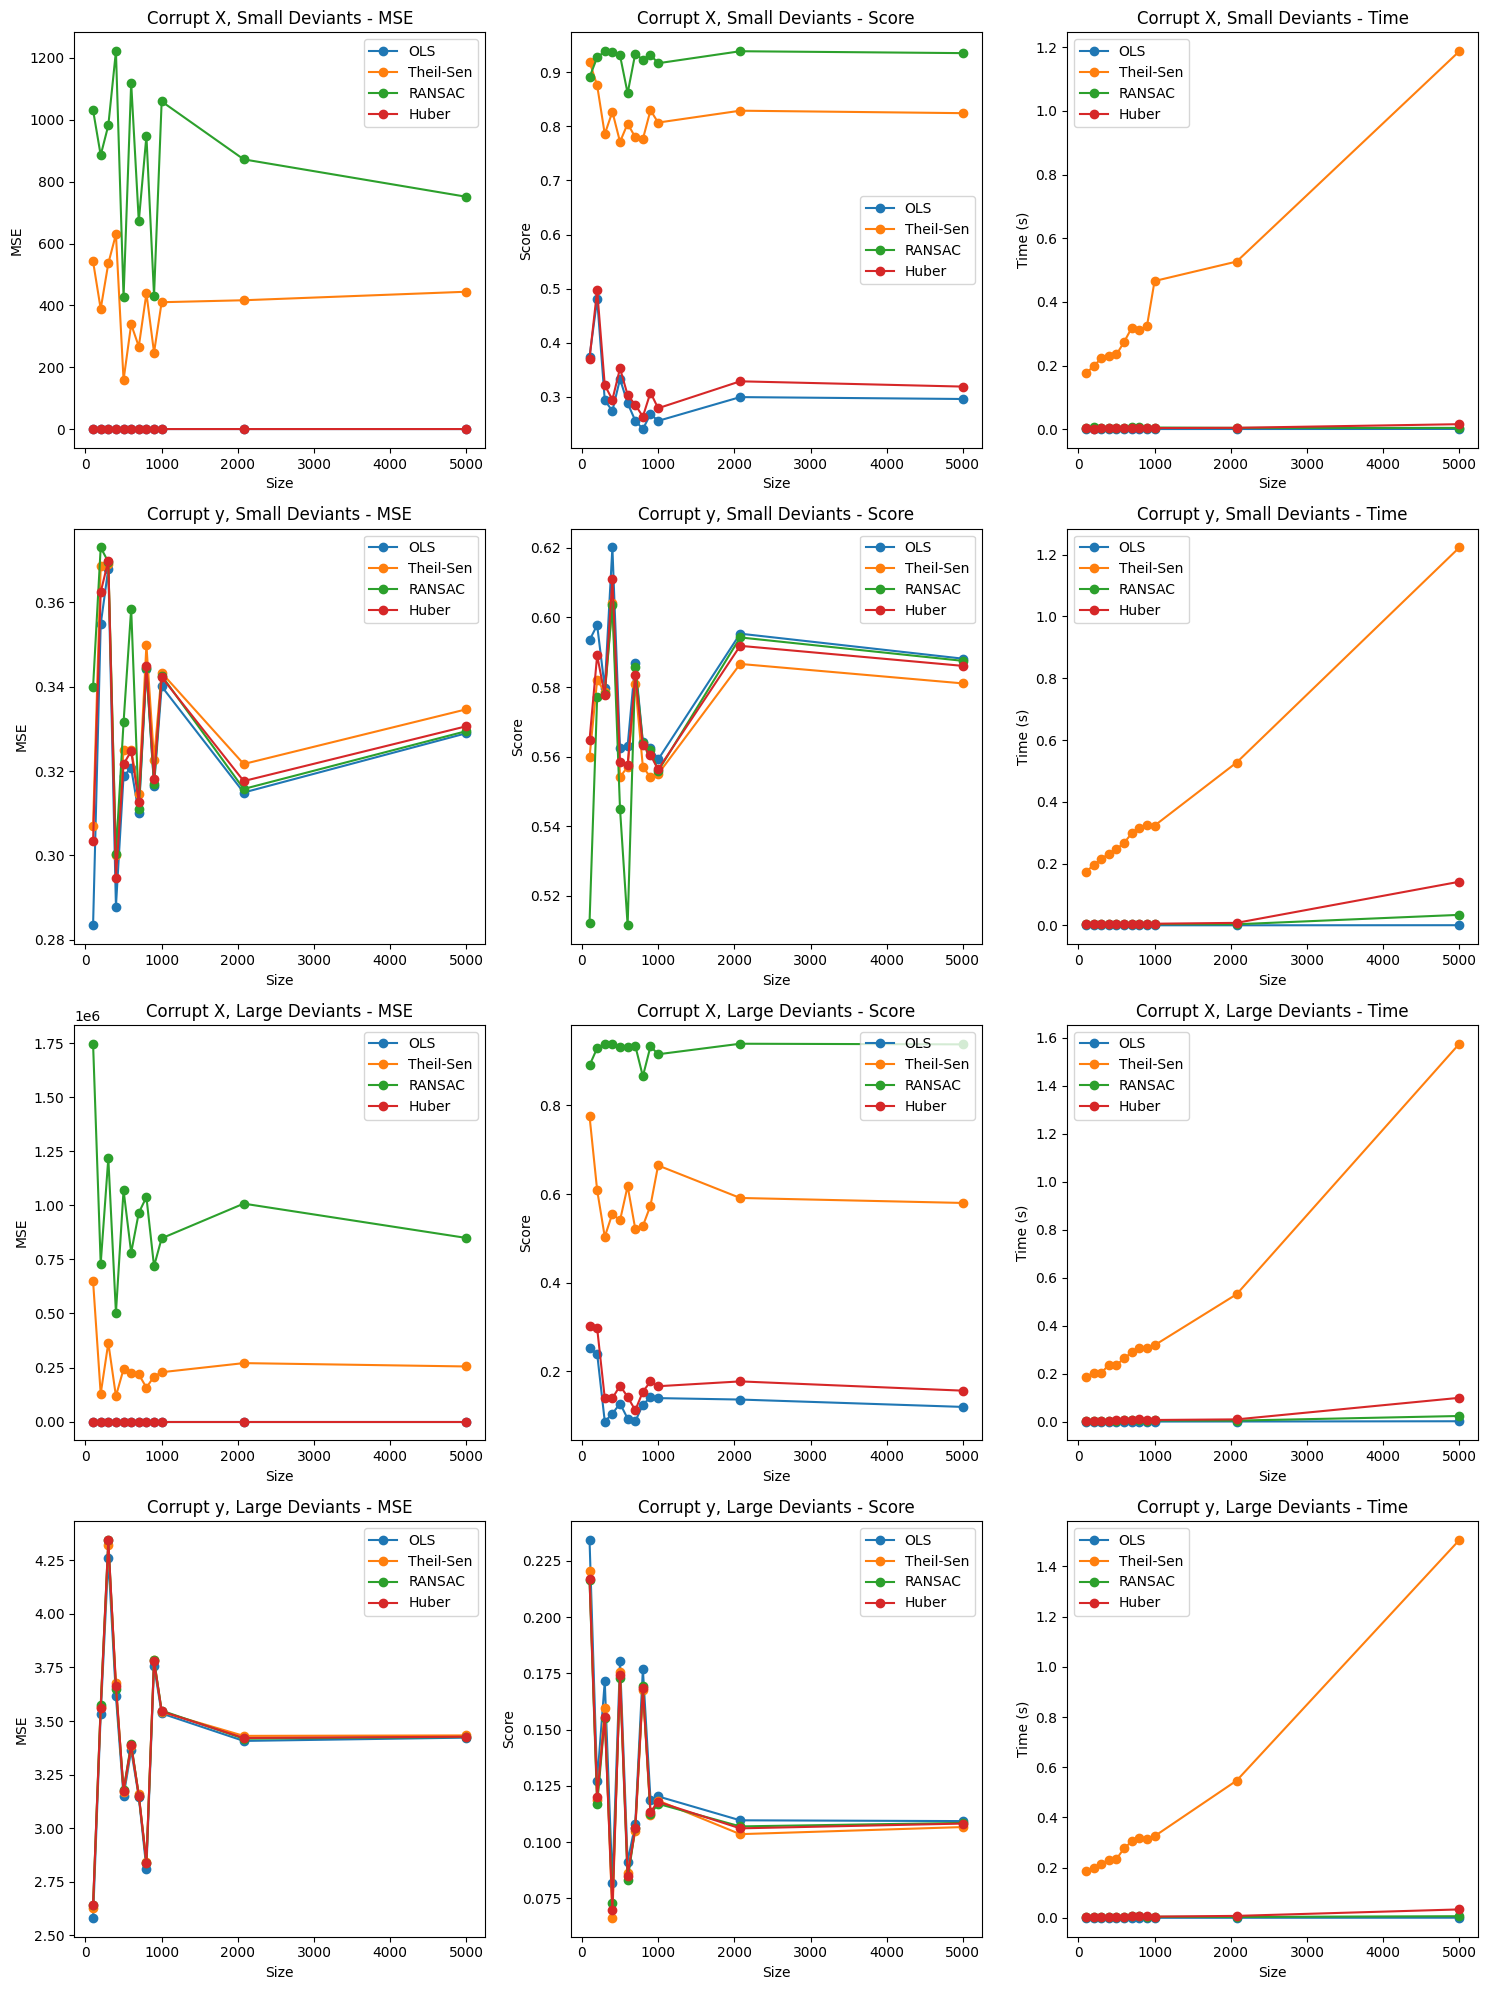

In [385]:
sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2077, 5000]
static_outlier = 0.1

compares_per_size = []
for size in sizes:
    data, data_errors, data_errors_large = _generate_data_with_outliers(
        n_samples=size, 
        outliers=static_outlier,  
        outliers_distribution='uniform', 
        outliers_error=3, 
        outliers_error_large=10
    )
    compare = _compare_models(data, data_errors, data_errors_large)
    compare = {k: v for k, v in compare.items() if k != 'Modeling Errors Only'}
    compares_per_size.append(compare)

titles = list(compares_per_size[0].keys()) 
models = list(next(iter(compares_per_size[0].values())).keys()) 

results_mse = {title: {model: [] for model in models} for title in titles}
results_score = {title: {model: [] for model in models} for title in titles}
results_time = {title: {model: [] for model in models} for title in titles}

for cmp_dict in compares_per_size:
    for title in titles:
        for model in models:
            mse, time_s, score = cmp_dict[title][model]
            results_mse[title][model].append(mse)
            results_score[title][model].append(score)
            results_time[title][model].append(time_s)

print(results_mse)

n_titles = len(titles)
fig, axes = plt.subplots(nrows=n_titles, ncols=3, figsize=(15, 5 * n_titles))

for i, title in enumerate(titles):
    ax_mse = axes[i, 0]
    ax_score = axes[i, 1]
    ax_time = axes[i, 2]
    
    for model in models:
        ax_mse.plot(sizes, results_mse[title][model], marker='o', label=model)
        ax_score.plot(sizes, results_score[title][model], marker='o', label=model)
        ax_time.plot(sizes, results_time[title][model], marker='o', label=model)
    
    ax_mse.set_title(f"{title} - MSE")
    ax_mse.set_xlabel("Size")
    ax_mse.set_ylabel("MSE")
    ax_mse.legend()
    
    ax_score.set_title(f"{title} - Score")
    ax_score.set_xlabel("Size")
    ax_score.set_ylabel("Score")
    ax_score.legend()
    
    ax_time.set_title(f"{title} - Time")
    ax_time.set_xlabel("Size")
    ax_time.set_ylabel("Time (s)")
    ax_time.legend()

plt.tight_layout()
plt.show()


compare by otliers percent

{'Corrupt X, Small Deviants': {'OLS': [0.37607670439227425, 0.41659539637660886, 0.4413615343604377, 0.46304751196458505, 0.45914079453276996, 0.4552513205083679, 0.44756060696359634, 0.4460901232798901], 'Theil-Sen': [306.3432843586455, 53.85891600885123, 11.823561368933992, 1.6227338746619908, 0.9649999193432046, 0.5733175452912412, 0.5152617158510916, 0.4862377992393748], 'RANSAC': [906.7647319392512, 1673.8816336403104, 2327.21911529768, 2507.9311372485854, 0.682992636584549, 0.6920767150026641, 0.5962682676624566, 0.6632585900113023], 'Huber': [0.38031195201616846, 0.4229194689028976, 0.44350662622735615, 0.4655261228315537, 0.4610396138852351, 0.45592349771749585, 0.4483290644286474, 0.44770469358606224]}, 'Corrupt y, Small Deviants': {'OLS': [0.33090661316616476, 0.5909443718673988, 1.0015775097000879, 1.1766309875453063, 1.5389277118314437, 1.7739870858464188, 2.127621546336064, 2.4155992472101273], 'Theil-Sen': [0.33389090742815253, 0.5941825998138138, 1.0025999448103156, 1.18

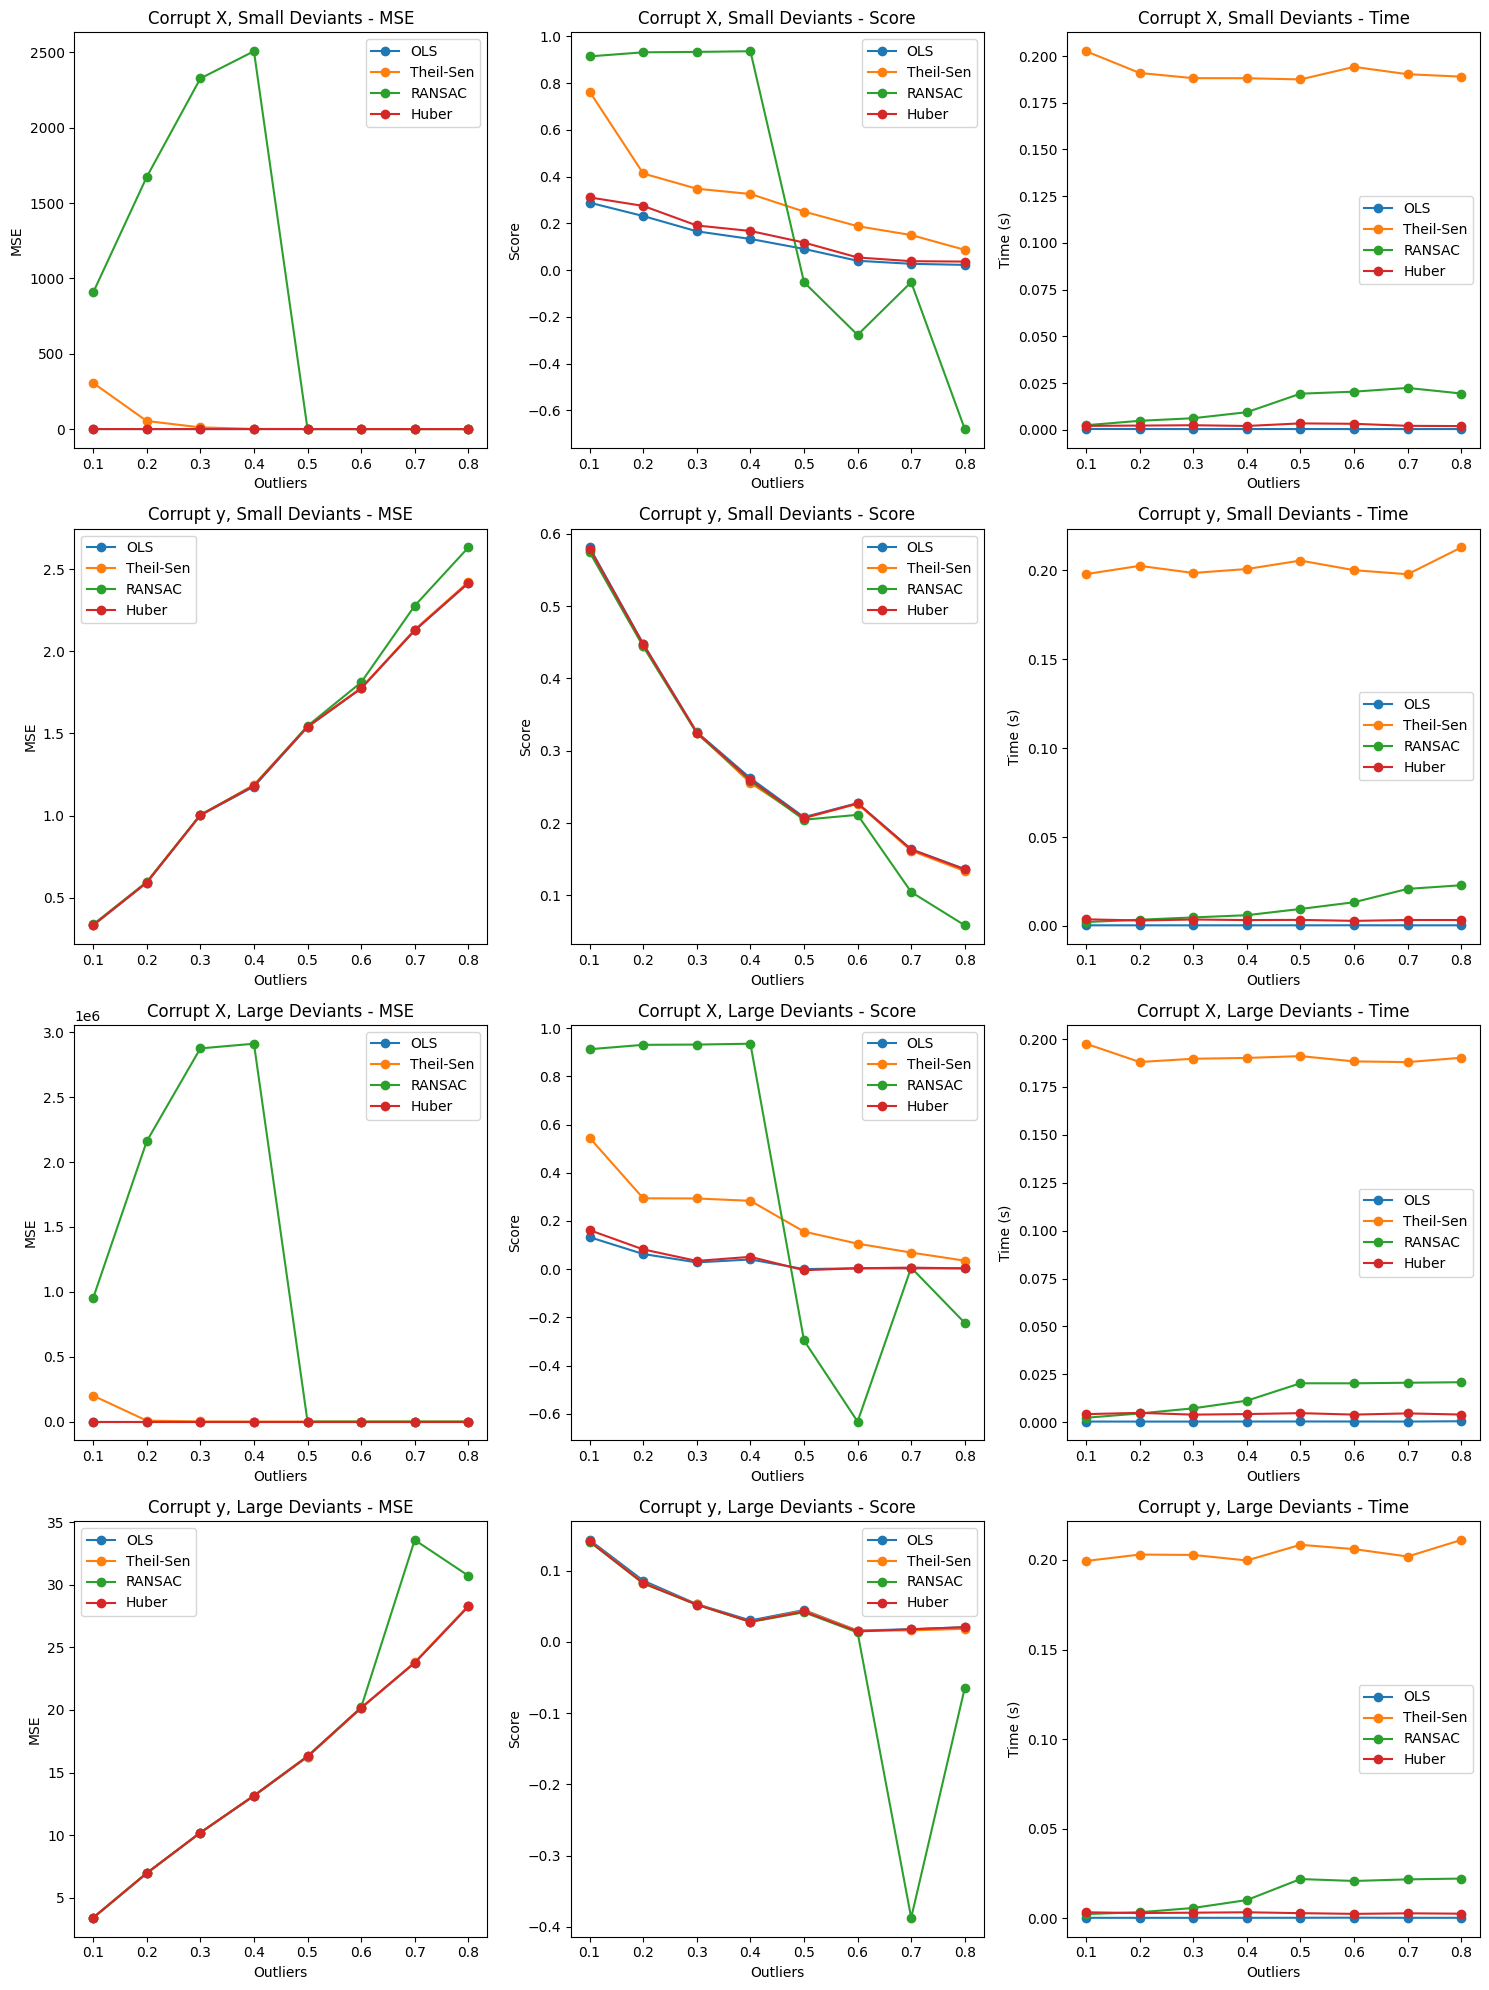

In [261]:
size = 1000
outliers = [x / 100.00 for x in range(10, 90, 10)]
                

compares_per_outlier = []
for outlier in outliers:
    data, data_errors, data_errors_large = _generate_data_with_outliers(
        n_samples=size, 
        outliers=outlier,  
        outliers_distribution='uniform', 
        outliers_error=3, 
        outliers_error_large=10
    )
    compare = _compare_models(data, data_errors, data_errors_large)
    
    compare = {k: v for k, v in compare.items() if k != 'Modeling Errors Only'}
    compares_per_outlier.append(compare)


titles = list(compares_per_outlier[0].keys())  
# ['Corrupt X, Small Deviants',...]
models = list(next(iter(compares_per_outlier[0].values())).keys())  
# ['OLS', 'Theil-Sen', 'RANSAC', 'Huber']


results_mse = {title: {model: [] for model in models} for title in titles}
results_score = {title: {model: [] for model in models} for title in titles}
results_time = {title: {model: [] for model in models} for title in titles}



for cmp_dict in compares_per_outlier:
    for title in titles:
        for model in models:
            mse, time_s, score = cmp_dict[title][model]
            results_mse[title][model].append(mse)
            results_score[title][model].append(score)
            results_time[title][model].append(time_s)
            
print(results_mse)


n_titles = len(titles)
fig, axes = plt.subplots(nrows=n_titles, ncols=3, figsize=(15, 5 * n_titles))

for i, title in enumerate(titles):
    ax_mse = axes[i, 0]
    ax_score = axes[i, 1]
    ax_time = axes[i, 2]
    
    for model in models:
        ax_mse.plot(outliers, results_mse[title][model], marker='o', label=model)
        ax_score.plot(outliers, results_score[title][model], marker='o', label=model)
        ax_time.plot(outliers, results_time[title][model], marker='o', label=model)
    
    ax_mse.set_title(f"{title} - MSE")
    ax_mse.set_xlabel("Outliers")
    ax_mse.set_ylabel("MSE")
    ax_mse.legend()
    
    ax_score.set_title(f"{title} - Score")
    ax_score.set_xlabel("Outliers")
    ax_score.set_ylabel("Score")
    ax_score.legend()
    
    ax_time.set_title(f"{title} - Time")
    ax_time.set_xlabel("Outliers")
    ax_time.set_ylabel("Time (s)")
    ax_time.legend()

plt.tight_layout()
plt.show()
                
            

{'Corrupt X, Small Deviants': {'OLS': [0.4181383539251508, 0.3673413603338884, 0.371908490240358], 'Theil-Sen': [12916.264806885907, 285.98239072049, 1148210.5205486827], 'RANSAC': [33969.61857212716, 877.897859291316, 3183777.622189106], 'Huber': [0.4259985261496226, 0.3701865996350487, 0.37527503511983457]}, 'Corrupt y, Small Deviants': {'OLS': [0.8174100401976184, 0.3214117036126316, 2.4254607225730243], 'Theil-Sen': [0.828382965631582, 0.3262137430682087, 2.5402632519732253], 'RANSAC': [0.8255194915494541, 0.32324747095673895, 2.563356423938086], 'Huber': [0.8241644650602769, 0.3228003516646179, 2.5482939368148783]}, 'Corrupt X, Large Deviants': {'OLS': [0.4576124609076869, 0.4148658630448829, 0.42607580918332], 'Theil-Sen': [12743833.32426476, 207081.17304424715, 179583561.5259573], 'RANSAC': [54328884.31224611, 1076372.1890701368, 861755894.6253937], 'Huber': [0.45794814504591613, 0.417416578086036, 0.43051113452771744]}, 'Corrupt y, Large Deviants': {'OLS': [13.486797272954508, 

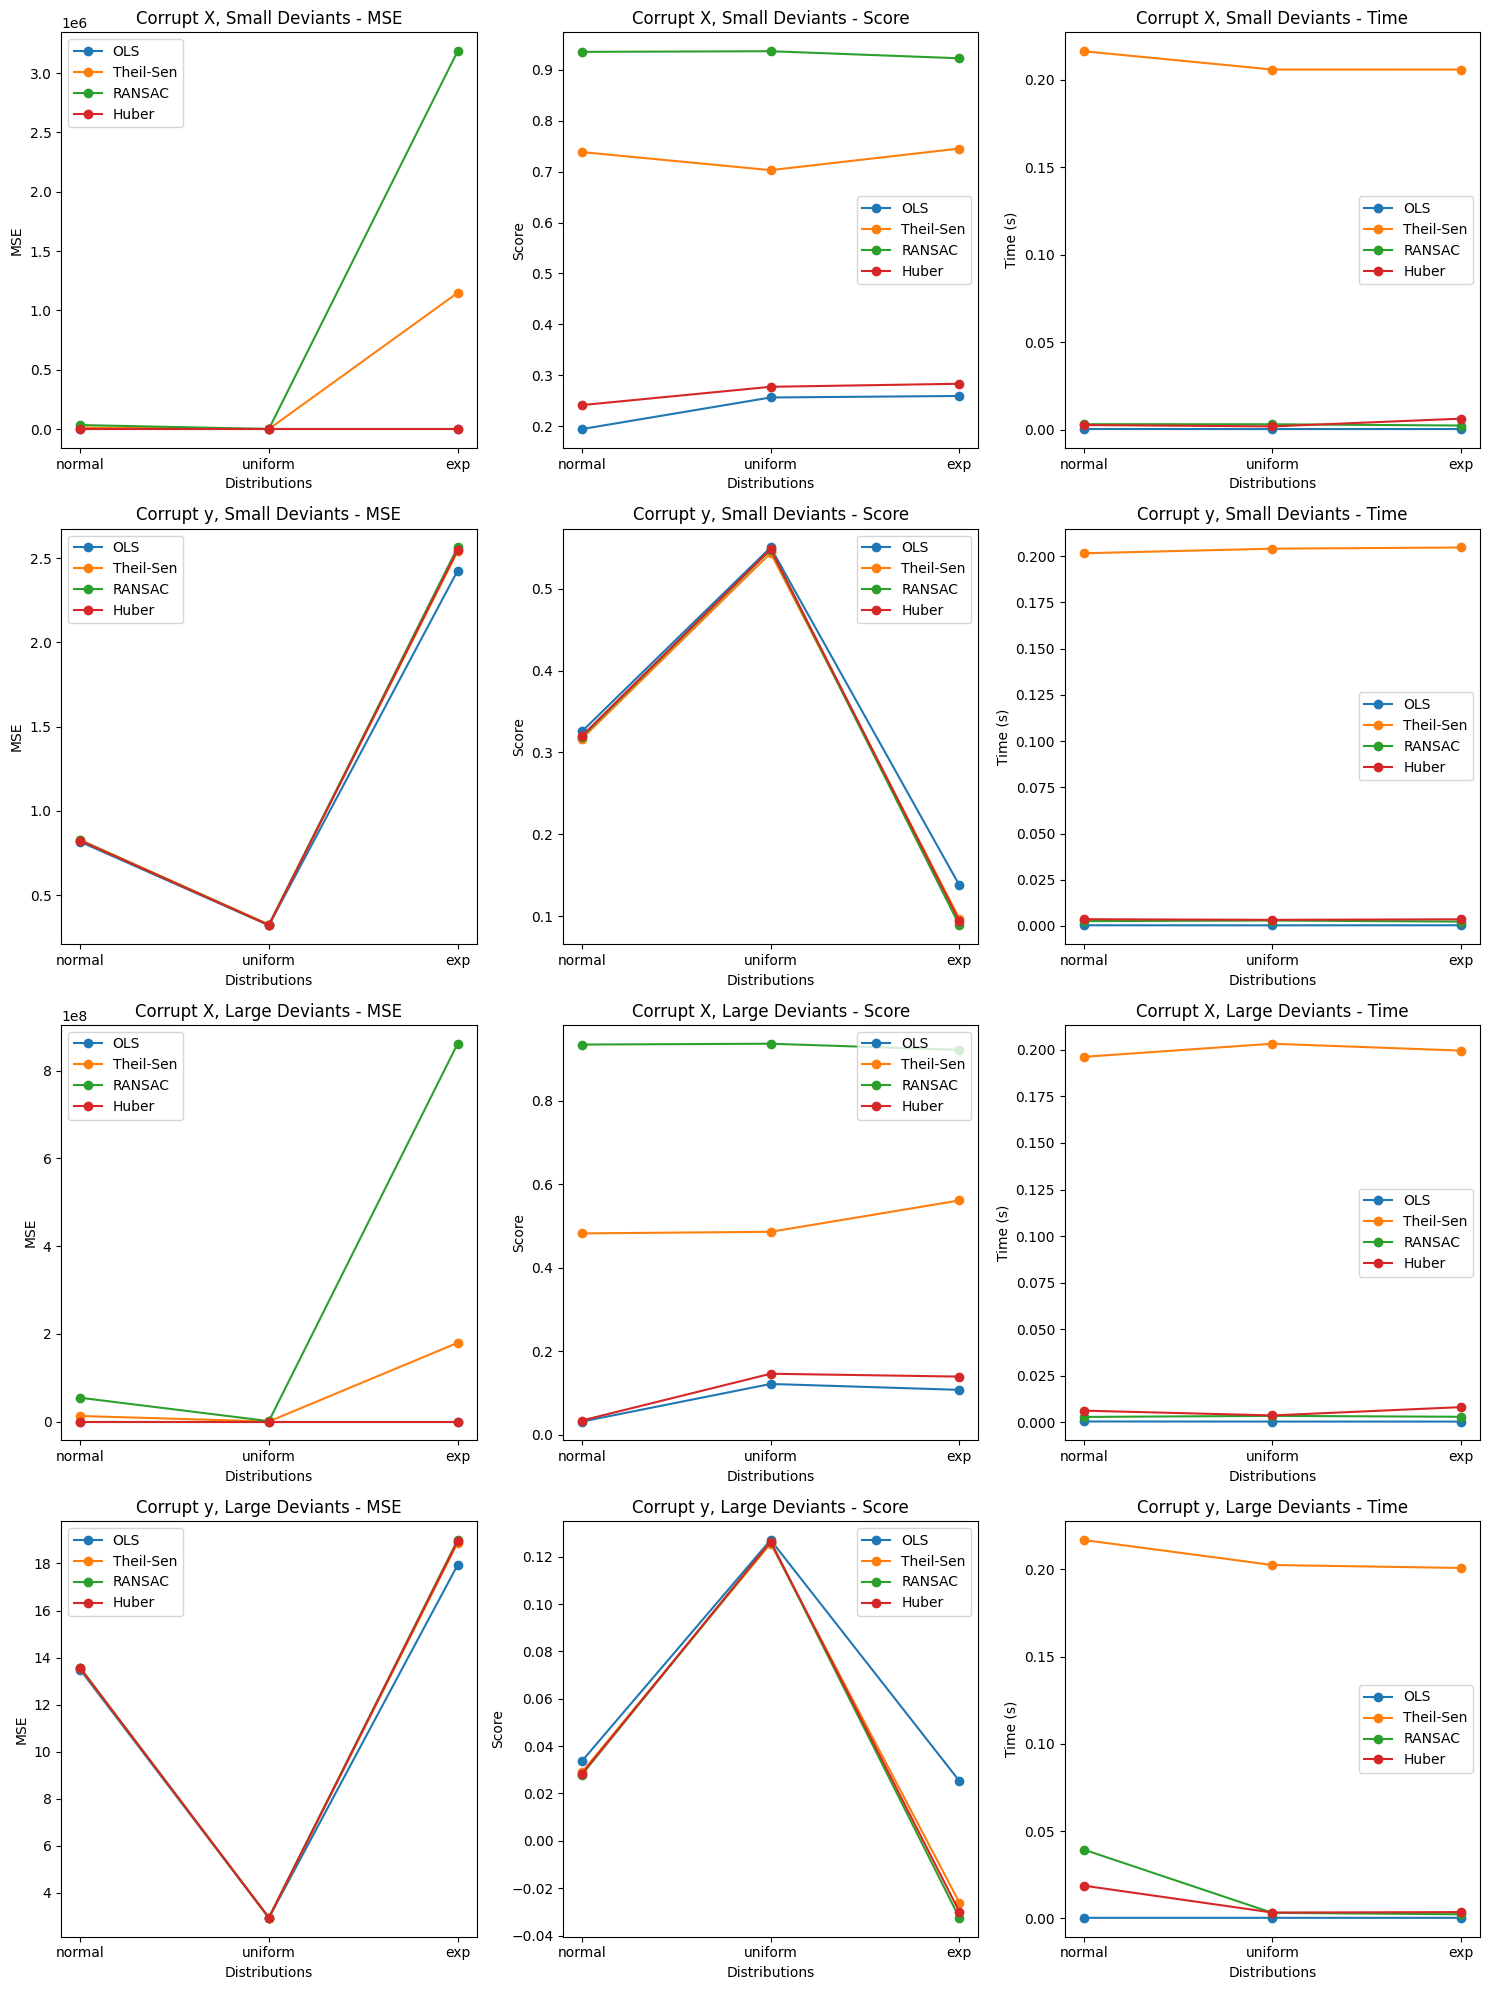

In [262]:
size = 1000
outlier = 0.1
distributions = ['normal', 'uniform', 'exp']

compares_per_outlier = []
for distribution in distributions:
    data, data_errors, data_errors_large = _generate_data_with_outliers(
        n_samples=size, 
        outliers=outlier,  
        outliers_distribution=distribution, 
        outliers_error=3, 
        outliers_error_large=10
    )
    compare = _compare_models(data, data_errors, data_errors_large)
    compare = {k: v for k, v in compare.items() if k != 'Modeling Errors Only'}
    compares_per_outlier.append(compare)

titles = list(compares_per_outlier[0].keys())  
models = list(next(iter(compares_per_outlier[0].values())).keys())

results_mse = {title: {model: [] for model in models} for title in titles}
results_score = {title: {model: [] for model in models} for title in titles}
results_time = {title: {model: [] for model in models} for title in titles}

for cmp_dict in compares_per_outlier:
    for title in titles:
        for model in models:
            mse, time_s, score = cmp_dict[title][model]
            results_mse[title][model].append(mse)
            results_score[title][model].append(score)
            results_time[title][model].append(time_s)
            
print(results_mse)

n_titles = len(titles)
fig, axes = plt.subplots(nrows=n_titles, ncols=3, figsize=(15, 5 * n_titles))

x_vals = list(range(len(distributions)))
for i, title in enumerate(titles):
    ax_mse = axes[i, 0]
    ax_score = axes[i, 1]
    ax_time = axes[i, 2]
    
    for model in models:
        ax_mse.plot(x_vals, results_mse[title][model], marker='o', label=model)
        ax_score.plot(x_vals, results_score[title][model], marker='o', label=model)
        ax_time.plot(x_vals, results_time[title][model], marker='o', label=model)
    
    ax_mse.set_title(f"{title} - MSE")
    ax_mse.set_xlabel("Distributions")
    ax_mse.set_ylabel("MSE")
    ax_mse.set_xticks(x_vals)
    ax_mse.set_xticklabels(distributions)
    ax_mse.legend()
    
    ax_score.set_title(f"{title} - Score")
    ax_score.set_xlabel("Distributions")
    ax_score.set_ylabel("Score")
    ax_score.set_xticks(x_vals)
    ax_score.set_xticklabels(distributions)
    ax_score.legend()
    
    ax_time.set_title(f"{title} - Time")
    ax_time.set_xlabel("Distributions")
    ax_time.set_ylabel("Time (s)")
    ax_time.set_xticks(x_vals)
    ax_time.set_xticklabels(distributions)
    ax_time.legend()

plt.tight_layout()
plt.show()


{'Corrupt X, Small Deviants': {'OLS': [0.03881162091845067, 0.05080295884791676, 0.08242401046070137, 0.13686173421815814, 0.1625113746850097, 0.18992327653116264, 0.2477956437095583, 0.2412538207241779, 0.2714242229114201, 0.27497378066706996, 0.31060225900134547, 0.3161802854561747, 0.33322680433282426, 0.33777668511529896, 0.36495991995452437, 0.347581885809205, 0.3634901116088256, 0.3445001957024341, 0.3427632546559085, 0.34707596022159337], 'Theil-Sen': [0.045926994563047316, 0.058306524718021495, 0.09738477405897944, 0.210692752389292, 0.34122654925456863, 0.33848235770564045, 1.1718481270041703, 1.0147375254549997, 2.569556707671797, 3.2429957052220515, 5.284829774797411, 4.7349439747268525, 9.695256816672151, 10.370848800032705, 10.77300182266104, 26.8138826735814, 18.058486490184244, 33.52508803783875, 32.18820164984035, 76.85171353286921], 'RANSAC': [0.03885094653198616, 0.05159053250720826, 0.1305143721310649, 0.32761163298017304, 0.36429789772516963, 0.3410933338880959, 1.7

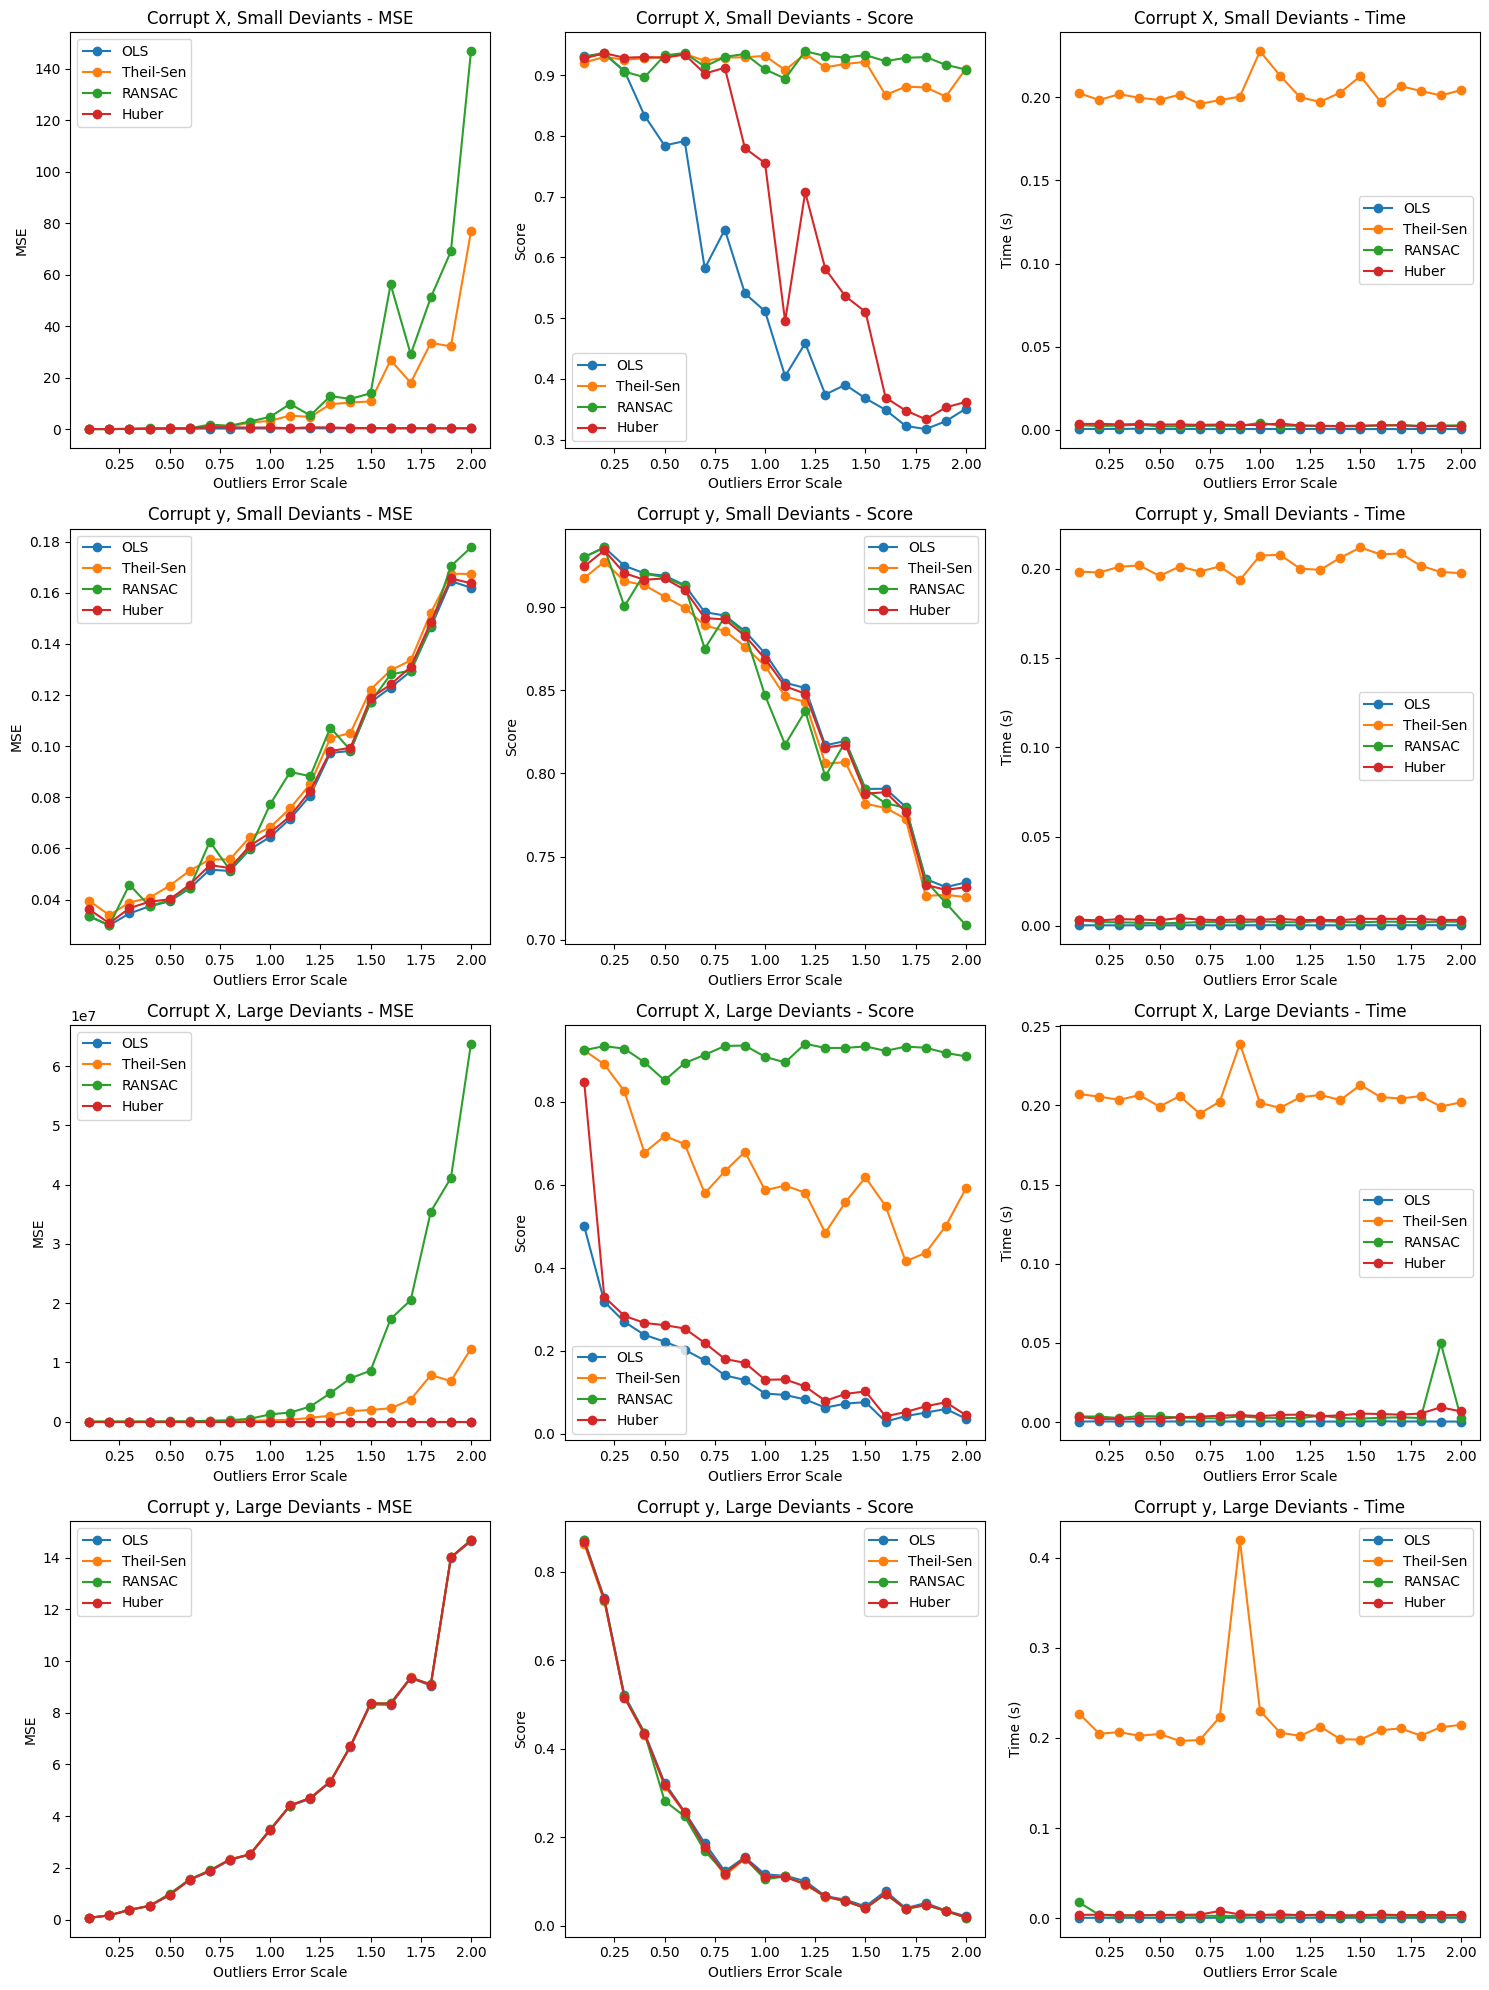

In [263]:
size = 1000
outlier = 0.1
distribution = 'uniform'
scales = [x / 10 for x in range(1, 21)]
                
compares_per_scale = []
for scale in scales:
    data, data_errors, data_errors_large = _generate_data_with_outliers(
        n_samples=size, 
        outliers=outlier,  
        outliers_distribution='uniform', 
        outliers_error=scale, 
        outliers_error_large=scale * 10
    )
    compare = _compare_models(data, data_errors, data_errors_large)
    # Remove 'Modeling Errors Only'
    compare = {k: v for k, v in compare.items() if k != 'Modeling Errors Only'}
    compares_per_scale.append(compare)

titles = list(compares_per_scale[0].keys())   # e.g. ['Corrupt X, Small Deviants', ...]
models = list(next(iter(compares_per_scale[0].values())).keys())   # e.g. ['OLS', 'Theil-Sen', 'RANSAC', 'Huber']

results_mse = {title: {model: [] for model in models} for title in titles}
results_score = {title: {model: [] for model in models} for title in titles}
results_time = {title: {model: [] for model in models} for title in titles}

for cmp_dict in compares_per_scale:
    for title in titles:
        for model in models:
            mse, time_s, score = cmp_dict[title][model]
            results_mse[title][model].append(mse)
            results_score[title][model].append(score)
            results_time[title][model].append(time_s)
            
print(results_mse)

n_titles = len(titles)
fig, axes = plt.subplots(nrows=n_titles, ncols=3, figsize=(15, 5 * n_titles))

for i, title in enumerate(titles):
    ax_mse = axes[i, 0]
    ax_score = axes[i, 1]
    ax_time = axes[i, 2]
    
    for model in models:
        ax_mse.plot(scales, results_mse[title][model], marker='o', label=model)
        ax_score.plot(scales, results_score[title][model], marker='o', label=model)
        ax_time.plot(scales, results_time[title][model], marker='o', label=model)
    
    ax_mse.set_title(f"{title} - MSE")
    ax_mse.set_xlabel("Outliers Error Scale")
    ax_mse.set_ylabel("MSE")
    ax_mse.legend()
    
    ax_score.set_title(f"{title} - Score")
    ax_score.set_xlabel("Outliers Error Scale")
    ax_score.set_ylabel("Score")
    ax_score.legend()
    
    ax_time.set_title(f"{title} - Time")
    ax_time.set_xlabel("Outliers Error Scale")
    ax_time.set_ylabel("Time (s)")
    ax_time.legend()

plt.tight_layout()
plt.show()


by distribution

## Гетероскедастичность

- **Вопрос 1**: Что такое гетероскедастичность?
- **Вопрос 2**: Какие последствия гетероскедастичности - почему положение о гомоскедачности так важно? 
- **Вопрос 3**: Мы наблюдаем гетероскедастичсность. Предложите примеры гетероскедастичности. В каких  случаях это нарушение возникает из-за нарушения других положений? 

В этой части рассмотрим данные о стоимости домовладения. При этом будем использовать следующие признаки:
* Y = стоимость дома
* X1 = площадь дома
* X2 = площадь участка
Подмножество набора данных об исследовании американского сообщества, полученного из Бюро переписей США.

In [264]:
data = pd.read_csv(f"{data_path}/realestate.txt", sep="\t") # pd.read_csv(f"{data_path}/realestate.csv").dropna()

In [265]:
# Делаем доп.датасет со всеми положениями
linear_X, linear_y = datasets.make_regression(n_samples=data.shape[0],
                                              n_features=data.shape[1],
                                              noise=75, random_state=46)

# Setting feature names to x1, x2, x3, etc. if they are not defined
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]

In [266]:
data.columns

Index(['SalePrice', 'SqFeet', 'Beds', 'Baths', 'Air', 'Garage', 'Pool', 'Year',
       'Quality', 'Style', 'Lot', 'Highway'],
      dtype='object')

In [267]:
X_train, X_test, y_train, y_test = train_test_split(data[["SqFeet"]], np.log(data["SalePrice"]))

Если провести регрессионный анализ и оценить график остатков в сравнении с предсказанными значениями, можно отметить несколько «коническую» форму остатков.

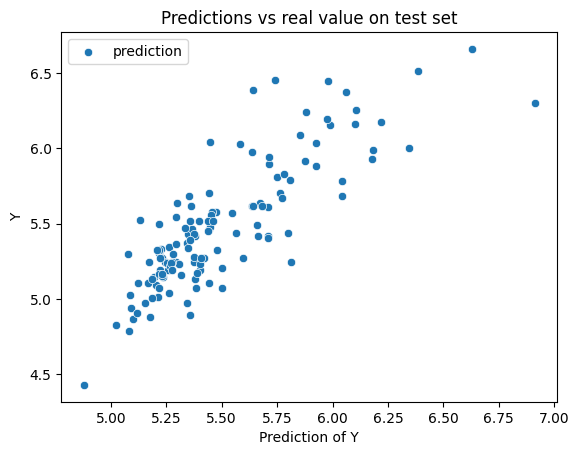

In [268]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
sns.scatterplot(x=preds, y=y_test, label="prediction")
plt.xlabel('Prediction of Y')
plt.ylabel('Y')
plt.legend()
plt.title(f'Predictions vs real value on test set')
plt.show()

In [269]:
print(f"The score of prediction is: {model.score(X_test, y_test)}")

The score of prediction is: 0.6887803736745175


Другой способ построить график остатков предлагает Sklearn

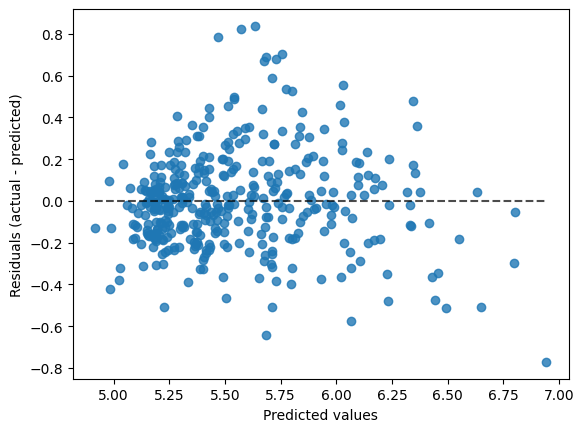

In [270]:
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_train, y_pred=model.predict(X_train))
display.plot()
plt.show()

Более объективную оценку могут дать специальные статистические тесты, например, тест Уайта или тест Брейша-Пагана

In [271]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt
import statsmodels.stats.diagnostic as smd

Тест Бреуша-Пагана  можно выполнить с помощью функции het_breuschpagan модуля statsmodels.stats.diagnostic для оценки того, объясняют ли независимые переменные дисперсию ошибок. Основные параметры функции het_breuschpagan resid - остатки модели, а exog_het — независимые переменные. Обратите внимание, что ему нужна также константная переменная. 
Этот тест проверяет нулевую гипотезу о том, что все дисперсии ошибок равны, в сравнении с альтернативой, согласно которой дисперсии ошибок являются мультипликативной функцией одной или нескольких переменных. Этот тест затрагивает линейную форму гетероскедастичности.

Тест Уайта (het_white) оценивает то, объясняют ли независимые переменные линейной регрессии, квадратичные независимые переменные и перемножения независимых переменных дисперсию ошибок. Он не накладывает ограничений на форму гетероскедастичности.  Внутри происходит регрессия квадратов остатков по отношению к исодным переменным, их квадратам и попарным произведениям. Он более обзий как раз из-за добавления дополнительных переменных. Например, квадраты позволяют найти гетероскедастичность в форме "песочных часов". Однако, у него есть минус в том, что исходная гипотеза разбивается на несколько.

**Вопрос**: почему это минус? Укажите теоретическую причину.


Основные параметры в функции het_white resid - остатки, а exog - независимые переменные для объяснения дисперсии ошибок модели. 

Выполним тесты для нашего датасета, чтобы понять, реально ли в модели присутствует гетероскедастичность.

In [272]:
def get_residual_df(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = df_results['Actual'] - df_results['Predicted']
    
    return df_results


In [273]:
res_train = get_residual_df(model, X_train, y_train)
res_test = get_residual_df(model, X_test, y_test)

In [274]:
X_test_new = X_test.copy()
X_test_new["const"]=1.

In [275]:
bptest = smd.het_breuschpagan(resid=res_test["Residuals"], exog_het=X_test_new)
print("lm:", bptest[0], "lm_pvalue:", bptest[1])

lm: 7.00033092710994 lm_pvalue: 0.008149464911350985


**Вопрос**: что означает pvalue? Можем ли мы сказать, что остатки гетероскедачстичны?

In [276]:
wtest = smd.het_white(resid=res_test["Residuals"], exog=X_test_new)
print("lm:", wtest[0], "lm_pvalue:", wtest[1])

lm: 7.932303092363871 lm_pvalue: 0.01894620661382818


### Решение проблемы
**Вопрос**: Как можно избавиться от гетероскедастичности (или уменьшить ее влияние)? 

Линейная модель описывается уравнением \begin{equation*} \textbf{Y}=\textbf{X}\beta+\epsilon^{*}, \end{equation*}
При этом $ \epsilon^{*} $ распределены нормально с нулевым средним и изменяющейся дисперсией:
\begin{equation*} \left(\begin{array}{cccc} \sigma^{2}_{1} & 0 & \ldots & 0 \\ 0 & \sigma^{2}_{2} & \ldots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \ldots & \sigma^{2}_{n} \\ \end{array} \right) \end{equation*}
Тогда мы можем определить веса $ w_i = 1/\sigma^{2}_{i} $ так чтобы
\begin{equation*}\textbf{W}=\left( \begin{array}{cccc} w_{1} & 0 & \ldots & 0 \\ 0& w_{2} & \ldots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0& 0 & \ldots & w_{n} \\ \end{array} \right) \end{equation*}


Поскольку каждый вес обратно пропорционален дисперсии ошибки, он отражает информацию, содержащуюся в этом наблюдении. Итак, наблюдение с небольшой дисперсией ошибки имеет большой вес, поскольку оно содержит относительно больше информации, чем наблюдение с большой дисперсией ошибки (малый вес).
Веса должны быть известны (или, чаще всего, оценены) с точностью до константы пропорциональности.

Тогда можно поставить задачу взвешенной регрессиии \begin{equation*} \sum_{i=1}^n w_i^2(y_i - (\alpha 1 + \beta x_i))^2 = \sum_{i=1}^n (w_i y_i - (\alpha w_i + \beta w_i x_i))^2
\end{equation*}


Так как остатки в нашей задаче зависят от величины Y, мы можем предсказать их по этому признаку. Однако, наприямую мы это сделать не можем, так как 

**Задание**: Постройте взвешенную модель, учитывающую гетероскедастичность. Для построения весов используйте аппроксимацию ошибки.

In [277]:
model = LinearRegression().fit(X_train, y_train)
residuals = (y_train - model.predict(X_train))**2
model_res = LinearRegression().fit(np.abs(X_train), residuals) 

In [278]:
# force all estimates to be positive
add_y_train = model_res.predict(np.abs(X_train))
add_y_test = model_res.predict(np.abs(X_test))


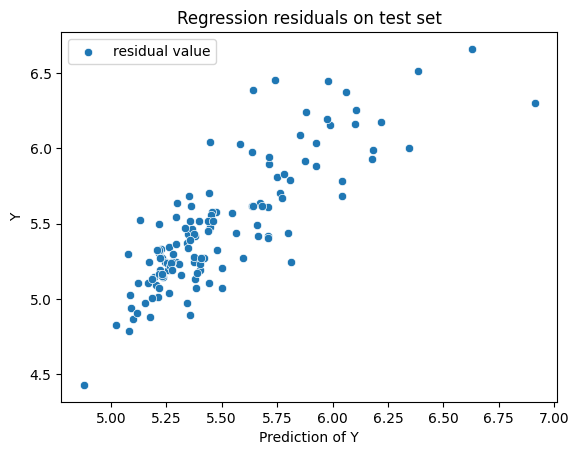

In [279]:
# Fit a regression model
sns.scatterplot(x=preds, y=y_test, label="residual value")
plt.xlabel('Prediction of Y')
plt.ylabel('Y')
plt.legend()
plt.title(f'Regression residuals on test set')
plt.show()

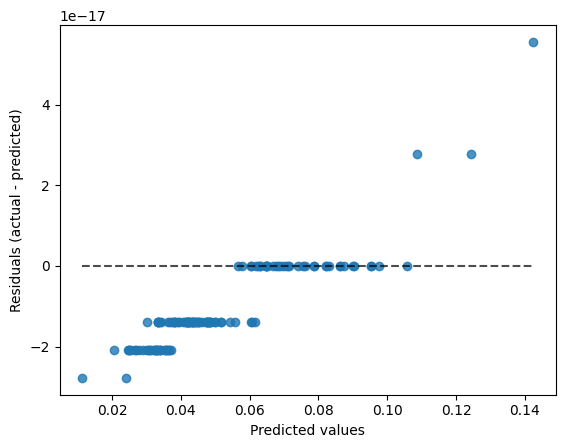

In [280]:
weight_regressor = LinearRegression().fit(np.abs(X_train), add_y_train)
residual_estimates_train = weight_regressor.predict(np.abs(X_train))
residual_estimates_test = weight_regressor.predict(np.abs(X_test))
display = PredictionErrorDisplay(y_true=add_y_test, y_pred=residual_estimates_test)
display.plot()
plt.show()

In [281]:
weights_train = 1 / (weight_regressor.predict(np.abs(X_train)))
weights_test = 1 / (weight_regressor.predict(np.abs(X_test)))

In [282]:
updated_model = LinearRegression().fit(X_train, y_train, weights_train)
updated_preds = updated_model.predict(X_test)

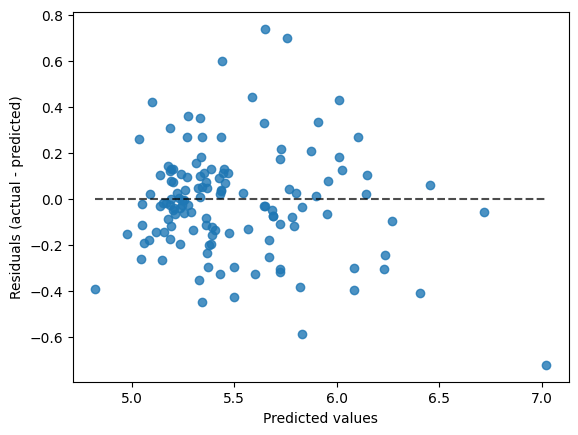

In [283]:
display = PredictionErrorDisplay(
    y_true=y_test, y_pred = updated_preds
    )
display.plot()
plt.show()

In [284]:
print(f"The score of prediction is: {updated_model.score(X_test, y_test)}")

The score of prediction is: 0.6847724866217748


In [285]:
X_test_new = X_test.copy()
X_test_new["const"]=1.

In [286]:
bptest = smd.het_breuschpagan(resid=(y_test-updated_preds), exog_het=X_test_new)
print("lm:", bptest[0], "lm_pvalue:", bptest[1])

lm: 11.254400511112001 lm_pvalue: 0.0007943447279663025


In [287]:
wtest = smd.het_white(resid=(y_test-updated_preds), exog=X_test_new)
print("lm:", wtest[0], "lm_pvalue:", wtest[1])

lm: 14.409853706954799 lm_pvalue: 0.0007429165358967293


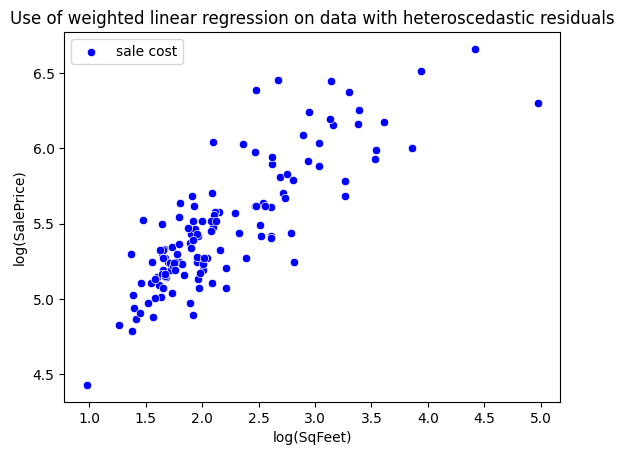

In [288]:
sns.scatterplot(x=X_test["SqFeet"], y=y_test, label='sale cost', color='blue')
# Постройте два графика моделей.
plt.xlabel('log(SqFeet)')
plt.ylabel('log(SalePrice)')
plt.legend()
plt.title(f'Use of weighted linear regression on data with heteroscedastic residuals')
plt.show()

В нашем случае остатки линейной регрессии симметричны, поэтому мы можем легко перейти на квантильную регрессиию, которая позволяет оценить заданные квантили таргета. Этот регрессор минимизирует MAE, в отличие от стандартной регрессии.

Вопрос: Почему он минимизирует MAE?


In [289]:
from sklearn.linear_model import QuantileRegressor

In [290]:
quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions_test = np.zeros_like(y_test, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(X_train, y_train).predict(X_test)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions_test = np.logical_or(
            out_bounds_predictions_test, y_pred >= y_test
        )
    elif quantile == max(quantiles):
        out_bounds_predictions_test = np.logical_or(
            out_bounds_predictions_test, y_pred <= y_test
        )

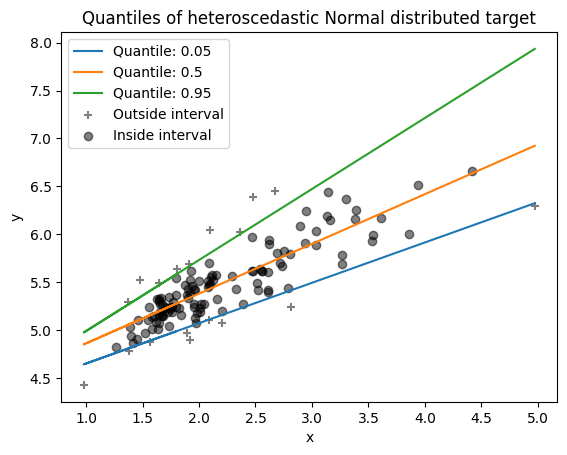

In [291]:
for quantile, y_pred in predictions.items():
    plt.plot(X_test, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    X_test[out_bounds_predictions_test],
    y_test[out_bounds_predictions_test],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    X_test[~out_bounds_predictions_test],
    y_test[~out_bounds_predictions_test],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")


Почитать: https://www3.nd.edu/~rwilliam/stats2/l25.pdf

**Задание**: Постройте модели, учитывающие гетероскедастичность  для  Anscombe 3 и 4. Предложите сами, как вы будете задавать веса.

In [292]:
quartet_df = pd.read_csv(f"{data_path}/Anscombe_quartet_data.csv")
X = np.array(quartet_df['x123']).reshape((-1, 1))
X_appr = np.abs(X)

3

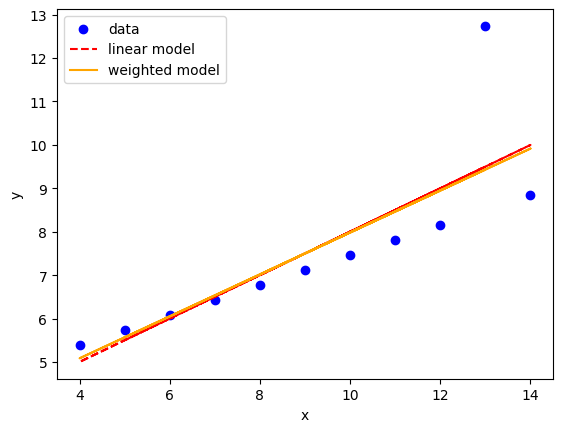

In [293]:
y = np.array(quartet_df['y3'])

model = LinearRegression().fit(X,y)
residuals = (y - model.predict(X))**2
model_residuals = LinearRegression().fit(X_appr, y)

weight_regressor = LinearRegression().fit(X_appr, model_residuals.predict(X_appr))
weights = 1 / (weight_regressor.predict(X_appr))
updated_model = LinearRegression().fit(X, y, sample_weight=weights)
weighted_preds = updated_model.predict(X)

y_pred = model.predict(X)

plt.scatter(x=X, y=y, label='data', color='blue')
plt.plot(X, y_pred, color='red', linestyle='--', label='linear model')
plt.plot(X, weighted_preds,  color='orange', label='weighted model', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


4

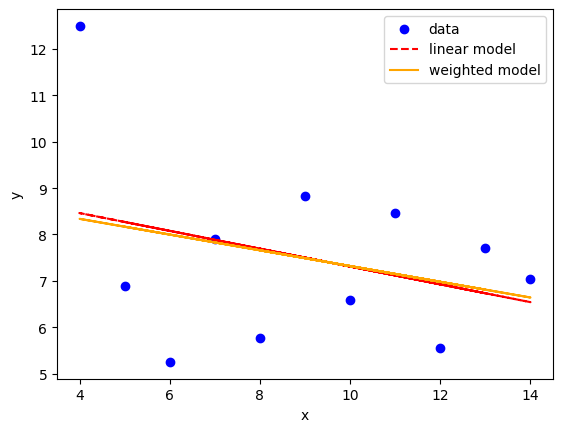

In [294]:
quartet_df = pd.read_csv(f"{data_path}/Anscombe_quartet_data.csv")
X = np.array(quartet_df['x123']).reshape((-1, 1))
X_appr = np.log(np.abs(X)+1)

y = np.array(quartet_df['y4'])

model = LinearRegression().fit(X,y)
residuals = (y - model.predict(X))**2
model_residuals = LinearRegression().fit(X_appr, y)

weight_regressor = LinearRegression().fit(X_appr, model_residuals.predict(X_appr))
weights = 1 / (weight_regressor.predict(X_appr))
updated_model = LinearRegression().fit(X, y, sample_weight=weights)
weighted_preds = updated_model.predict(X)

y_pred = model.predict(X)

plt.scatter(x=X, y=y, label='data', color='blue')
plt.plot(X, y_pred, color='red', linestyle='--', label='linear model')
plt.plot(X, weighted_preds,  color='orange', label='weighted model', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


**Задание**: Постройте синтетические данные, подходящие для линейной модели. Покажите, поможет ли использование QuantileRegressor для удаления выбросов получить лучшую модель и для каких видов гетероскедастичности (выбросы, распределение, "форма" шума). 
- **answer: везде малое улучшение**

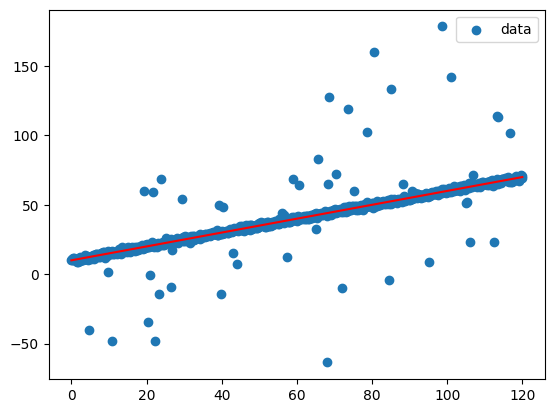

In [309]:
from sklearn.linear_model import QuantileRegressor

np.random.seed(42)
size=1000
X = np.linspace(0, 120, size)

y_true = X * 0.5 + 10
y = y_true + np.random.normal(0, 1, size)


idx = np.random.choice(size, 50, replace=False)
y[idx]+= np.random.randn(50) * 50
plt.scatter(X, y, label="data")
plt.plot(X, y_true, color='red')
plt.legend()
plt.show()



[lin]Score: 0.7173330872895789
[quantile]Score: 0.7191364273060462
[lin]MSE: 121.47686427777198
[quantile]MSE: 120.70187406640792


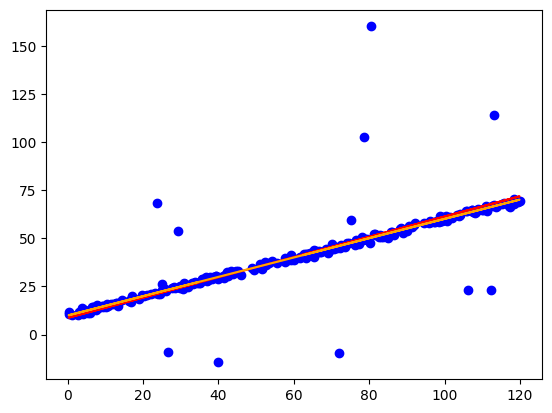

In [318]:
X = X.reshape(-1 ,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions_train = np.zeros_like(y_train, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(X_train, y_train).predict(X_train)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions_train = np.logical_or(
            out_bounds_predictions_train, y_pred >= y_train
        )
    elif quantile == max(quantiles):
        out_bounds_predictions_train = np.logical_or(
            out_bounds_predictions_train, y_pred <= y_train
        )
        
        
model = LinearRegression().fit(X_train, y_train)
model_q = LinearRegression().fit(X_train[~out_bounds_predictions_train], y_train[~out_bounds_predictions_train])
y_pred = model.predict(X_test)
y_pred_q = model_q.predict(X_test)
plt.scatter(X_test, y_test, label='data', color='blue')
plt.plot(X_test, y_pred, color='red', label='linear model')
plt.plot(X_test, y_pred_q, color='orange', label='quantile model')

print('[lin]Score:', model.score(X_test, y_test))
print('[quantile]Score:', model_q.score(X_test, y_test))
print('[lin]MSE:', mean_squared_error(y_test, y_pred))
print('[quantile]MSE:', mean_squared_error(y_test, y_pred_q))


plt.show()


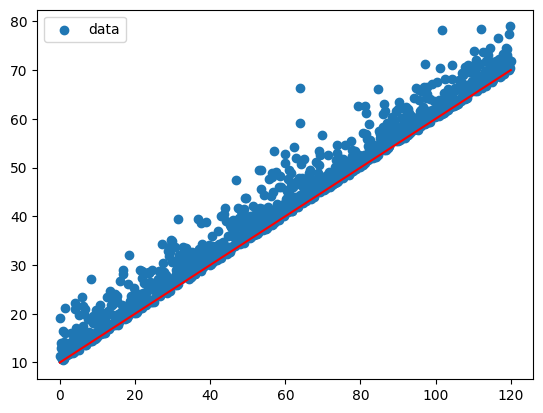

In [327]:
from sklearn.linear_model import QuantileRegressor

np.random.seed(42)
size=1000
X = np.linspace(0, 120, size)

y_true = X * 0.5 + 10
noise = np.random.exponential(scale=3, size=size) 
y = y_true + noise



plt.scatter(X, y, label="data")
plt.plot(X, y_true, color='red')
plt.legend()
plt.show()


[lin]Score: 0.9762807087217658
[quantile]Score: 0.9765200645742135
[lin]MSE: 7.352278140442082
[quantile]MSE: 7.278084911770305


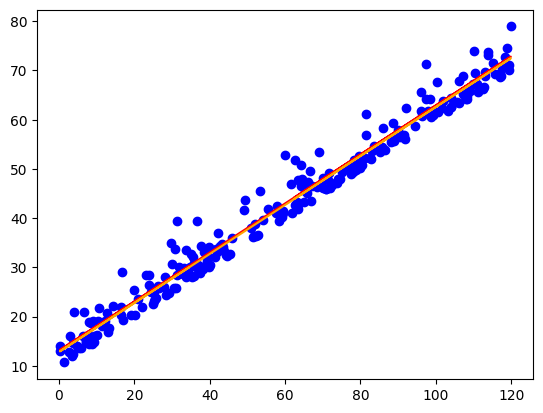

In [328]:
X = X.reshape(-1 ,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions_train = np.zeros_like(y_train, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(X_train, y_train).predict(X_train)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions_train = np.logical_or(
            out_bounds_predictions_train, y_pred >= y_train
        )
    elif quantile == max(quantiles):
        out_bounds_predictions_train = np.logical_or(
            out_bounds_predictions_train, y_pred <= y_train
        )
        
        
model = LinearRegression().fit(X_train, y_train)
model_q = LinearRegression().fit(X_train[~out_bounds_predictions_train], y_train[~out_bounds_predictions_train])
y_pred = model.predict(X_test)
y_pred_q = model_q.predict(X_test)
plt.scatter(X_test, y_test, label='data', color='blue')
plt.plot(X_test, y_pred, color='red', label='linear model')
plt.plot(X_test, y_pred_q, color='orange', label='quantile model')

print('[lin]Score:', model.score(X_test, y_test))
print('[quantile]Score:', model_q.score(X_test, y_test))
print('[lin]MSE:', mean_squared_error(y_test, y_pred))
print('[quantile]MSE:', mean_squared_error(y_test, y_pred_q))


plt.show()


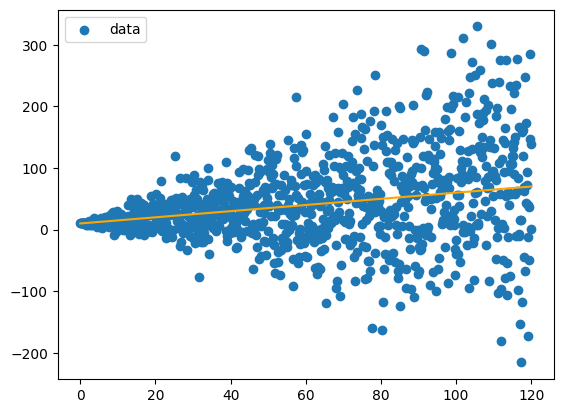

In [334]:
from sklearn.linear_model import QuantileRegressor

np.random.seed(42)
size=1000
X = np.linspace(0, 120, size)

y_true = X * 0.5 + 10
y = y_true + np.random.normal(0, X, size)



plt.scatter(X, y, label="data")
plt.plot(X, y_true, color='orange')
plt.legend()
plt.show()

[lin]Score: 0.018070977895771834
[quantile]Score: 0.02261187689002564
[lin]MSE: 4886.00034182075
[quantile]MSE: 4863.4051913173535


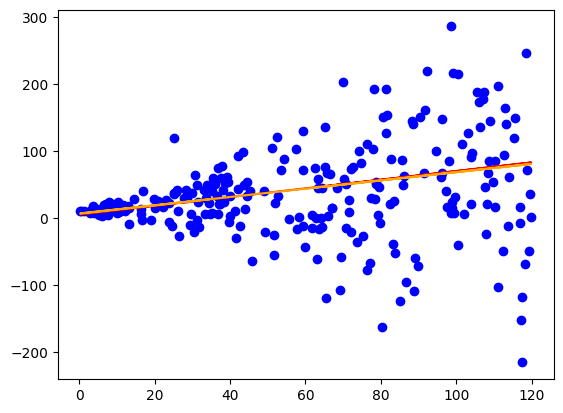

In [335]:
X = X.reshape(-1 ,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions_train = np.zeros_like(y_train, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(X_train, y_train).predict(X_train)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions_train = np.logical_or(
            out_bounds_predictions_train, y_pred >= y_train
        )
    elif quantile == max(quantiles):
        out_bounds_predictions_train = np.logical_or(
            out_bounds_predictions_train, y_pred <= y_train
        )
        
        
model = LinearRegression().fit(X_train, y_train)
model_q = LinearRegression().fit(X_train[~out_bounds_predictions_train], y_train[~out_bounds_predictions_train])
y_pred = model.predict(X_test)
y_pred_q = model_q.predict(X_test)
plt.scatter(X_test, y_test, label='data', color='blue')
plt.plot(X_test, y_pred, color='red', label='linear model')
plt.plot(X_test, y_pred_q, color='orange', label='quantile model')

print('[lin]Score:', model.score(X_test, y_test))
print('[quantile]Score:', model_q.score(X_test, y_test))
print('[lin]MSE:', mean_squared_error(y_test, y_pred))
print('[quantile]MSE:', mean_squared_error(y_test, y_pred_q))


plt.show()


## Мультиколлинеарность

Мультиколлинеарность представляет собой проблему, поскольку она дает менее надежные результаты регрессионной модели. Это связано с более широкими доверительными интервалами (большими стандартными ошибками), которые могут снизить статистическую значимость коэффициентов регрессии. При анализе данных это может привести к ложным впечатлениям.

Рассмотрим уже знакомый нам набор данных, посвященный недвижимости.

In [336]:
data = pd.read_csv(f"{data_path}/realestate.txt", sep="\t")

In [337]:
data["SalePrice"] = np.log(data["SalePrice"])
data.describe()

,SalePrice,SqFeet,Beds,Baths,Air,Garage,Pool,Year,Quality,Style,Lot,Highway
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,5.525443,2.260879,3.477927,2.646833,0.831094,2.097889,0.069098,1966.856046,2.186180,3.349328,24.344668,0.021113
std,0.430851,0.711726,1.003835,1.058861,0.375029,0.653405,0.253864,17.620476,0.639923,2.563209,11.681280,0.143900
min,4.430817,0.980000,1.000000,1.000000,0.000000,0.000000,0.000000,1885.000000,1.000000,1.000000,4.560000,0.000000
25%,5.192957,1.701000,3.000000,2.000000,1.000000,2.000000,0.000000,1956.000000,2.000000,1.000000,17.159000,0.000000
50%,5.437644,2.061000,3.000000,3.000000,1.000000,2.000000,0.000000,1966.000000,2.000000,2.000000,22.196000,0.000000
75%,5.814131,2.638000,4.000000,3.000000,1.000000,2.000000,0.000000,1981.000000,3.000000,7.000000,26.777000,0.000000
max,6.824374,5.032000,7.000000,7.000000,1.000000,7.000000,1.000000,1998.000000,3.000000,11.000000,86.830000,1.000000


Обучим базовую модель на одном признаке.

In [338]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data[["SqFeet"]], data["SalePrice"], random_state=42)
model.fit(x_train, y_train)
print(f"Model score is: {model.score(x_test, y_test)}")
print(f"Coefficients are: {model.coef_}")

Model score is: 0.696237587585443
Coefficients are: [0.50970481]


Теперь добавим несколько видов мультиколлинеарности в данных.

### Совершенная коллинеарность

Если две или более независимых переменных имеют между собой линейную связь, то
у нас получается идеальная мультиколлинеарность.
Примеры: включение одной и той же информации дважды (стоимость в рублях и долларах), неправильное использование фиктивных переменных (dummy variables trap) и т. д.
Вот пример идеальной мультиколлинеарности в модели с двумя объясняющими
переменными:
\begin{equation}
y = α_{1} X_1 + \alpha_{2} X_2
\end{equation}
\begin{equation}
X_1 = \beta_1 X_2 + \beta_2
\end{equation}


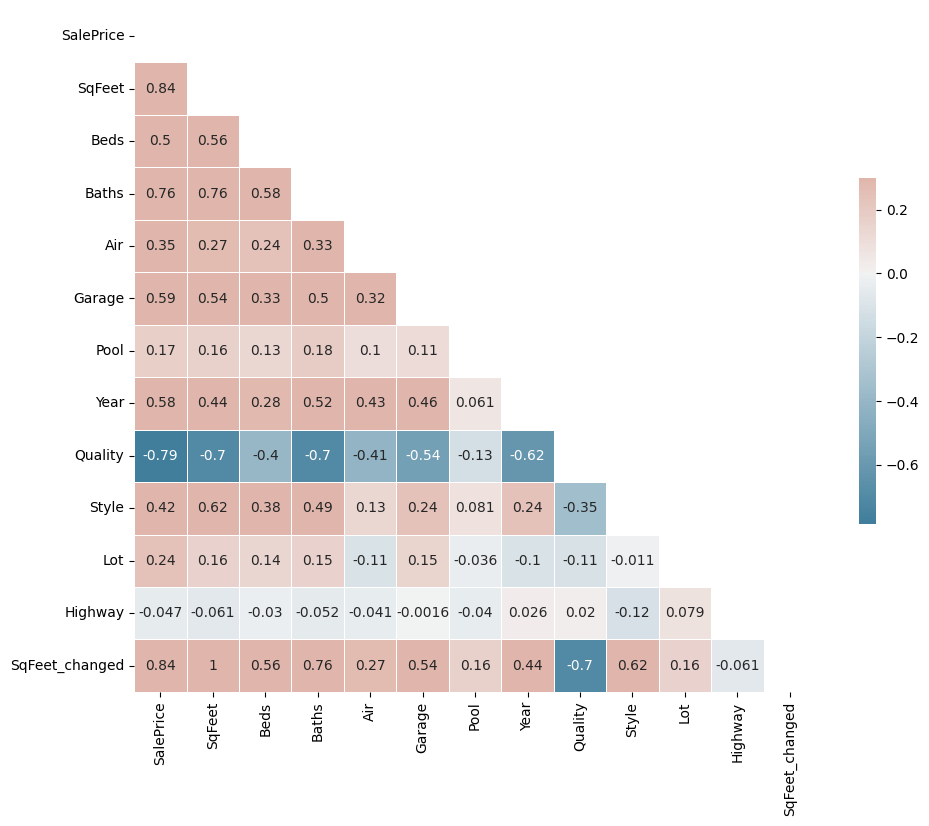

In [339]:
data["SqFeet_changed"] = data["SqFeet"]* 0.8 + 10
corrplot(data)

In [340]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data[["SqFeet_changed", "SqFeet"]], data["SalePrice"], random_state=42)
model.fit(x_train, y_train)
model.score(x_test, y_test)
print(f"Model score is: {model.score(x_test, y_test)}")
print(f"Coefficients are: {model.coef_}")

Model score is: 0.6923267728228703
Coefficients are: [-1.18415317e+13  9.47322539e+12]


In [341]:
data["SqFeet_changed_2"] = data["SqFeet"]* 0.5 - 10
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data[["SqFeet_changed", "SqFeet_changed_2", "SqFeet"]], data["SalePrice"], random_state=42)
model.fit(x_train, y_train)
model.score(x_test, y_test)
print(f"Model score is: {model.score(x_test, y_test)}")
print(f"Coefficients are: {model.coef_}")

Model score is: 0.6920569504852474
Coefficients are: [-1.19223853e+13 -9.57304391e+11  1.00165604e+13]


По идее, совершенная коллинеарность не дает в принципе построить линейную модель, так как невозможно оценить маржинальный эффект воздействия признака на целевую переменную, сохраняя остальные константными.
)
На практике же, даже если конкретная реализация OLS позволит построить коэффициенты, это ведет к тому, что модель перестает быть устойчивой.

### Несовершенная мультиколлинеарность
Несовершенная мультиколлинеарность не нарушает базовых предположений ЛР. Следовательно, теорема Гаусса-Маркова говорит нам, что оценки МНК состоятельны.

Так почему же нас волнует мультиколлинеарность?
2. Дисперсия и стандартные ошибки оценок коэффициентов регрессии будут
увеличиваться. Это означает более низкую t-статистику.
3. На общую точность уравнения регрессии мультиколлинеарность практически не повлияет.
4. Коэффициенты регрессии будут сильно зависеть от признаков. Таким образом, коэффициенты существенно измениться при добавлении или удалении переменных.

In [342]:
data["SqFeet_changed"] = data["SqFeet"] * 0.8 - 20
data["SqFeet_changed_2"] = data["SqFeet_changed"] * 1.5 + 10

data["SqFeet_changed"] += np.random.normal(+1, 0.5, len(data["SqFeet_changed"]))
data["SqFeet_changed_2"] += np.random.normal(-1, 0.5, len(data["SqFeet_changed"]))


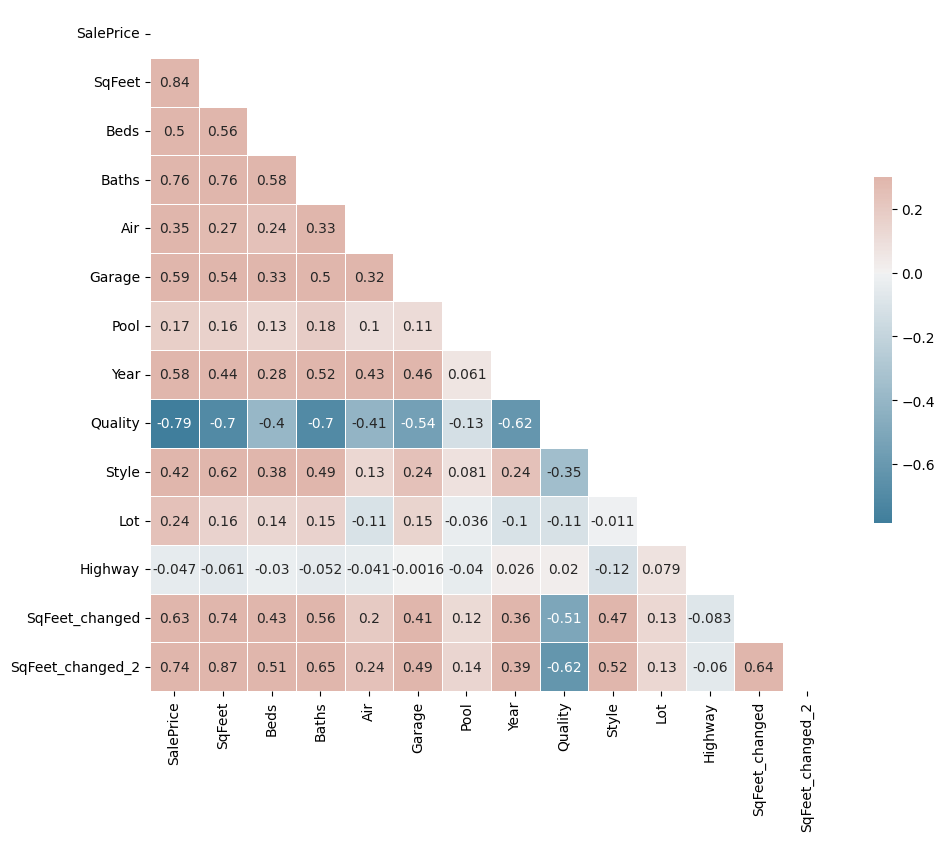

In [343]:
corrplot(data)

In [344]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data[["SqFeet_changed", "SqFeet_changed_2", "SqFeet"]], data["SalePrice"], random_state=42)
model.fit(x_train, y_train)
model.score(x_test, y_test)
print(f"Model score is: {model.score(x_test, y_test)}")
print(f"Coefficients are: {model.coef_}")

Model score is: 0.6973465511805892
Coefficients are: [0.01912585 0.01715373 0.47321593]


In [345]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data[["SqFeet_changed", "SqFeet"]], data["SalePrice"], random_state=42)
model.fit(x_train, y_train)
model.score(x_test, y_test)
print(f"Model score is: {model.score(x_test, y_test)}")
print(f"Coefficients are: {model.coef_}")

Model score is: 0.6954600074249313
Coefficients are: [0.01923714 0.49416223]


Как видно, только один признак имеет большой вес, точность при этом практически не меняется. Однако значимость многих признаков становится неудовлетворительной. Поэтому, если оценить значимость коэффициентов модели, можно обнаружить, что многие признаки просто не нужны. При этом получается, что даже при очень небольшом изменении модели мы можем сделать совершенно противоположные выводы о том, какие признаки важны.

Итак, первый способ найти коллинеарные признаки - оценить значимость коэффициентов (t-statistic + p-value)

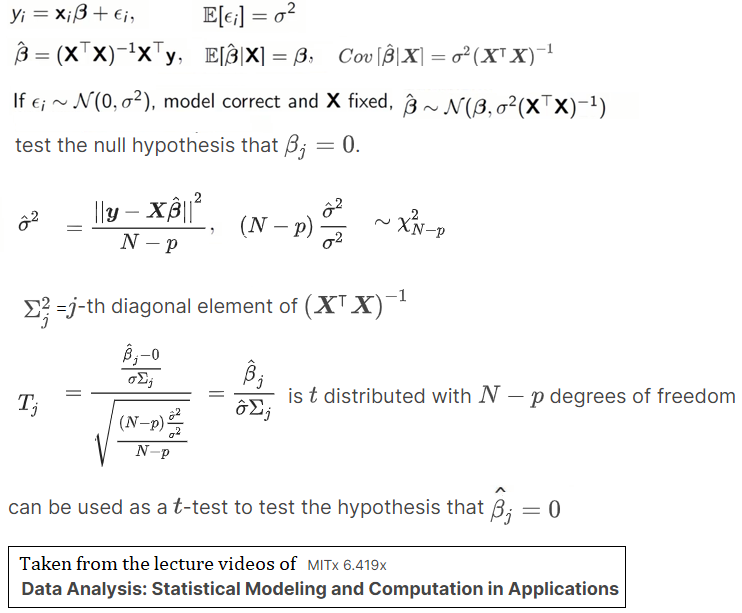

In [346]:
from scipy.stats import t

In [359]:
def get_p_values(model, x: pd.DataFrame, y: pd.DataFrame, a: float = 0.01) -> None:
  beta_hat = [model.intercept_] + model.coef_.tolist()
  n = len(x)
  print(f"Coefficients: {beta_hat}")
  
  
  x_1 = np.column_stack((np.ones(n), x))
  
  residuals = y - model.predict(x)
  sigma_hat = np.sqrt(np.sum(residuals ** 2) / (n - x_1.shape[1]))
  
  beta_cov = np.linalg.inv(x_1.T.dot(x_1))
  t_vals = np.array(beta_hat) / (sigma_hat * np.sqrt(np.diag(beta_cov)))
  
  # 2-sided
  p_vals = t.sf(np.abs(t_vals), df=(n - x_1.shape[1])) * 2
  
  print(f"T values: {t_vals}")
  print(f"p-values: {p_vals}")
  print(f"Is valuable: {p_vals < a}")

In [360]:
get_p_values(model, x_test, y_test)

Coefficients: [4.72934926491158, 0.019237136284138315, 0.4941622304476329]
T values: [ 5.31621674  0.40578194 11.19130901]
p-values: [4.56659572e-07 6.85580343e-01 1.07598009e-20]
Is valuable: [ True False  True]


Мультиколлинеарность можно обнаружить и с помощью коэффициента инфляции дисперсии (VIF). Для каждого признака в построенной модели этот коэффициент покащзывает, в какой степени коэфициент "испорчен" коллинеарностью с другими признаками.

В методе VIF мы выбираем каждый признак и сравниваем его со всеми другими признаками. Для каждого признака коэффициент рассчитывается как:

image.png
где R-квадрат — коэффициент детерминации в линейной регрессии этого признака, построенной по всем остальным признакам (1-to-all). Его значение лежит между 0 и 1.
Как мы видим из формулы, чем больше значение R-квадрат, тем больше VIF. Следовательно, больший VIF означает большую корреляцию. Это согласуется с тем фактом, что более высокое значение R-квадрат означает более сильную коллинеарность. Обычно значение VIF выше 5 указывает на высокую мультиколлинеарность.


In [362]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

print(vif_data)

          feature       VIF
0  SqFeet_changed  9.496676
1          SqFeet  9.496676


Как мы видим, наши переменные имеют очень высокие значения VIF, что означает сильную коллинеарность между ними.


In [363]:
features = ['SqFeet', 'Beds', 'Baths', 'Air', 'Garage', 'Pool', 'Year',
       'Quality', 'Style', 'Lot', 'Highway']

In [364]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data[features], data["SalePrice"], random_state=42)
model.fit(x_train, y_train)
model.score(x_test, y_test)
print(f"Model score is: {model.score(x_test, y_test)}")
print(f"Coefficients are: {model.coef_}")

Model score is: 0.8333627167756659
Coefficients are: [ 0.32128686  0.01746661  0.05093416  0.00689765  0.03780231  0.03515141
  0.0033515  -0.11809948 -0.01708504  0.00487232 -0.06529713]


In [366]:
vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [ variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif_data

,feature,VIF
0,SqFeet,44.314842
1,Beds,21.771159
2,Baths,21.310745
3,Air,7.332373
4,Garage,17.244375
5,Pool,1.114873
6,Year,121.269750
7,Quality,33.782352
8,Style,4.639236
9,Lot,5.769237


Теперь можно удалить некоторые признаки. Для этого используются разные способы feature selection. Посмотрим, узменится ли предсказание при удалении некоторых признаков

**Задание**: Постройте модель, удалив лишние признаки. Можно ли получить модель с лучшим скором?

In [384]:
# Your code
selected_features = ['SqFeet', 'Pool', 'Highway', 'Lot', 'Style', 'Air']

model_fs = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data[selected_features], data["SalePrice"], random_state=42)
model.fit(x_train, y_train)
print(f"Model score is: {model.score(x_test, y_test)}")
print(f"Coefficients are: {model.coef_}")

Model score is: 0.7497089954496895
Coefficients are: [ 0.51232454  0.03607475 -0.02206481  0.00461818 -0.01951707  0.13915282]
